In [1]:
import numpy as np
import pandas as pd


In [2]:
#%matplotlib qt5
#%matplotlib
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [36]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

ImportError: cannot import name 'options'

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\300277-5m.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,6.0464,166666.0,6.0761,26900.0,6.1452,6.0464,0
2019-01-02 09:40:00,6.0859,71003.0,6.0464,11600.0,6.0859,6.0267,1
2019-01-02 09:45:00,6.0859,54124.0,6.0662,8800.0,6.0859,6.0662,2
2019-01-02 09:50:00,6.0859,77469.0,6.0761,12600.0,6.0859,6.0662,3
2019-01-02 09:55:00,6.1156,450860.0,6.0859,73200.0,6.1255,6.0563,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [10]:
idx.shape

NameError: name 'idx' is not defined

In [12]:
idx.head()

,datetime,TmIdx,date_str
0,2019-01-02 09:35:00,0,01-02 09:35
1,2019-01-02 09:40:00,1,01-02 09:40
2,2019-01-02 09:45:00,2,01-02 09:45
3,2019-01-02 09:50:00,3,01-02 09:50
4,2019-01-02 09:55:00,4,01-02 09:55


### Find Market Open

In [16]:
idx['internal'] = idx['datetime'].diff()

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m

In [13]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [14]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))

In [15]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 6.0761, 0))

In [16]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [17]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [18]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [19]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [20]:
PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()

In [21]:
m.__dict__

{'CenterStrict_LD': {},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 6.0761, 0))],
 'Lv2_L': [Trend2(0, 0, Point(0.0, 6.0761, 0))],
 'Lv3_L': [Trend3(0, 0, Point(0.0, 6.0761, 0))],
 'MPLv0_L': [],
 'MPLv1_L': [],
 'MPLv2_L': [],
 'MPLv3_L': [],
 'PCLv0_L': [<LayerModel5.PairChain at 0x1ceb18d61d0>],
 'PCLv1_L': [<LayerModel5.PairChain at 0x1ceb1cc8668>],
 'PCLv2_L': [<LayerModel5.PairChain at 0x1ceb1cc86a0>],
 'PCLv3_L': [<LayerModel5.PairChain at 0x1ceb1cc86d8>],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv2_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv3_L': [Pair-1(TmS:0.0, 0, [0])],
 'PT01Lv0_L': [<__main__.Pattern01Lv0 at 0x1ceb18d6b70>,
 'PT01Lv1_L': [<__main__.Pattern01Lv1 at 0x1ceb18d6240>,
 'PT01Lv2_L': [<__main__.Pattern01Lv2 at 0x1ceb18d6e10>,
 'PT01Lv3_L': [],
 'TmIdx': 0,
 'bin_cnt': 20,
 'layer': 4,
 'obj_list': {'mergedpair': [[], [], [], [], []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:

In [22]:
ef.event_config

[{'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv0'],
    'param': ['']}},
  'Stick': {'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']},
   'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']}},
  'level': 0},
 {'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairChainLv1': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv1'],
    'param': ['']}},
  'TrendLv1': {'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']},
   'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]'],
    'param': ['', '']},
   'PEAK': {

In [23]:
Position.m = m
Position.L = m.position

In [24]:
main()

TmIdx:12.0,[[<frame.Event object at 0x000001CEB1CC3588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:21.0,[[<frame.Event object at 0x000001CEB1CC3780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
TmIdx:22.0,[[<frame.Event object at 0x000001CEB1CC3588>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 0],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:29.0,[[<frame.Event object at 0x000001CEB1CC3BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0, 1]
Lv1.update1st:status=0,mp:3,(0.0, 6.0761, 0),(10.0, 6.1847, -1),(29.0, 6.1452, -1),[StdK(10.0, 6.1847, 6.1255, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (19.0, 6.1255, 1))

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:247.0,[[<frame.Event object at 0x000001CEB1CE57B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Lv1.upd1st():case1, status:1, mp:[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],pp:9
Lv1.produceNewTrend:case1, mp=[17, 18, 19, 20, 21, 22]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (204.0, 6.1749, 1)),peak(210.0, 6.2243, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (223.0, 6.2638, -1)),peak(204.0, 6.1749, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (233.0, 6.2045, 1)),peak(204.0, 6.1749, 1),drt:-1
TrendLv1.updat

test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
TmIdx:324.0,[[<frame.Event object at 0x000001CEB1CF06A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26, 27, 28, 29]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (316.0, 6.1057, 1)),peak(315.0, 6.1156, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26, 27, 28, 29, 30]
m.PCLv0_L[0].update2()
TmIdx:325.0,[[<frame.Event object at 0x000001CEB1CF0780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 

test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:407.0,[[<frame.Event object at 0x000001CEB1CF8F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:409.0,[[<frame.Event object at 0x000001CEB1CF8588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:412.0,[[<frame.Event object at 0x000001CEB1CF8D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[32, 33, 34, 35, 36, 37, 38, 39]
Lv1.upd1st():case1, status:1, mp:[32, 33, 34, 35, 36, 37, 38, 39, 40],pp:5
Lv1.produceNewTrend:case1, mp=[37, 38, 39, 40]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (390.0, 5.9773, 1)),peak(391.0, 6.0168, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (396.0, 6.0365, -1)),peak(390.0, 5.9773, 1),drt:-1
TrendLv1.updatedPeakP(s

test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:480.0,[[<frame.Event object at 0x000001CEB1CFFA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:481.0,[[<frame.Event object at 0x000001CEB1CFF668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:483.0,[[<frame.Event object at 0x000001CEB1CFFC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:485.0,[[<frame.Event object at 0x000001CEB1CFFF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:489.0,[[<frame.Event object at 0x000001CEB1CFFF28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:490.0,[[<frame.Event object at 0x000001CEB1CFFE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:492.0,[[<frame.Event object at 0x000001CEB1CFF1D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:506.0,[[<frame.Event object at 0x000001CEB1CFF978>]]
(0, Stick, NEW)


test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:590.0,[[<frame.Event object at 0x000001CEB1D0D2B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:592.0,[[<frame.Event object at 0x000001CEB1D0DA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:598.0,[[<frame.Event object at 0x000001CEB1D0DA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:600.0,[[<frame.Event object at 0x000001CEB1D0DAC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:604.0,[[<frame.Event object at 0x000001CEB1D0D470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (598.0, 5.7599, 1)),peak(600.0, 5.7698, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
m.PCLv0_L[0].update2()
TmId

test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:689.0,[[<frame.Event object at 0x000001CEB1D09B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[63, 64, 65, 66]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[63, 64, 65, 66, 67]
m.PCLv0_L[0].update2()
TmIdx:689.0,[[<frame.Event object at 0x000001CEB1D09D30>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:691.0,[[<frame.Event object at 0x000001CEB1D09E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:694.0,[[<frame.Event object at 0x000001CEB1D09CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:695.0,[[<frame.Event object at 0x000001CEB1D094E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:704.0,[[<frame.Event object at 0x000001CEB1D09438>]]
(0, 

test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:834.0,[[<frame.Event object at 0x000001CEB1D20668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:838.0,[[<frame.Event object at 0x000001CEB1D200F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:840.0,[[<frame.Event object at 0x000001CEB1D20278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:846.0,[[<frame.Event object at 0x000001CEB1D20C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[72, 73, 74, 75]
Lv1.upd1st():case1, status:1, mp:[72, 73, 74, 75, 76],pp:1
Lv1.produceNewTrend:case1, mp=[73, 74, 75, 76]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (816.0, 5.7599, 1)),peak(790.0, 5.8389, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, 

test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:1052.0,[[<frame.Event object at 0x000001CEB1D2ACC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1054.0,[[<frame.Event object at 0x000001CEB1D2ADD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1057.0,[[<frame.Event object at 0x000001CEB1D28080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[87, 88]
Lv1.upd1st():case1, status:1, mp:[87, 88, 89],pp:1
Lv1.produceNewTrend:case1, mp=[88, 89]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[88, 89]
m.PCLv0_L[0].update2()
TmIdx:1057.0,[[<frame.Event object at 0x000001CEB1D2A748>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1

TmIdx:1166.0,[[<frame.Event object at 0x000001CEB1D2F128>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
TmIdx:1173.0,[[<frame.Event object at 0x000001CEB1D2F860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[96, 97, 98, 99]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[96, 97, 98, 99, 100]
m.PCLv0_L[0].update2()
TmIdx:1173.0,[[<frame.Event object at 0x000001CEB1D2F128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1174.0,[[<frame.Event object at 0x000001CEB1D2F390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 26],layer_

test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:1303.0,[[<frame.Event object at 0x000001CEB1D48518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1307.0,[[<frame.Event object at 0x000001CEB1D480F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1321.0,[[<frame.Event object at 0x000001CEB1D48B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[114, 115, 116, 117]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[117, 118]
m.PCLv0_L[0].update2()
TmIdx:1321.0,[[<frame.Event object at 0x000001CEB1D480F0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[18, 19, 20, 21, 22, 23, 24]
TrendLv2.updatedPeakP(st_idx_

test:PP.cursor()__start_cursor:[0, 32],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 43],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:1486.0,[[<frame.Event object at 0x000001CEB1D5F8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]
m.PCLv0_L[0].update2()
TmIdx:1486.0,[[<frame.Event object at 0x000001CEB1D5F9E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1487.0,[[<frame.Event object at 0x000001CEB1D5FE80>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 32],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 33],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
t

test:PP.cursor()__start_cursor:[1, 47],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
TmIdx:1548.0,[[<frame.Event object at 0x000001CEB1D687F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[143, 144, 145, 146, 147]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1541.0, 6.2539, 1)),peak(1533.0, 6.244, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[143, 144, 145, 146, 147, 148]
m.PCLv0_L[0].update2()
TmIdx:1549.0,[[<frame.Event object at 0x000001CEB1D68278>, <frame.Event object at 0x000001CEB1D68048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 34],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 46],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 47],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2

test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:1720.0,[[<frame.Event object at 0x000001CEB1D73748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1721.0,[[<frame.Event object at 0x000001CEB1D73240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1723.0,[[<frame.Event object at 0x000001CEB1D737F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1724.0,[[<frame.Event object at 0x000001CEB1D73A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1726.0,[[<frame.Event object at 0x000001CEB1D73B38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1730.0,[[<frame.Event object at 0x000001CEB1D73EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[157, 158, 159, 160, 161, 162, 163, 164, 165]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1724.0, 6.5503, 1)),peak(1726.0, 6.6293, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treate

test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 54],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 42],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
TmIdx:1806.0,[[<frame.Event object at 0x000001CEB1D76278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[166, 167, 168, 169, 170, 171, 172, 173]
Lv1.upd1st():case1, status:1, mp:[166, 167, 168, 169, 170, 171, 172, 173, 174],pp:5
Lv1.produceNewTrend:case1, mp=[171, 172, 173, 174]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1778.0, 6.6787, 1)),peak(1781.0, 6.7281, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1793.0, 6.7676, -1)),peak(1778.0, 6.6787, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1801.0, 6.6491, 1)),peak(1778.0, 6.6787, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_s

test:PP.cursor()__start_cursor:[0, 41],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 57],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 58],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:1880.0,[[<frame.Event object at 0x000001CEB1D82BA8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:1881.0,[[<frame.Event object at 0x000001CEB1D82C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[179, 180, 181, 182]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[179, 180, 181, 182, 183]
m.PCLv0_L[0].update2()
TmIdx:1881.0,[[<frame.Event object a

test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
TmIdx:1964.0,[[<frame.Event object at 0x000001CEB1D8DF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195]
Lv1.upd1st():case1, status:1, mp:[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196],pp:11
Lv1.produceNewTrend:case1, mp=[193, 194, 195, 196]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1950.0, 7.1727, 1)),peak(1947.0, 7.311, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1954.0, 7.3012, -1)),peak(1950.0, 7.1727, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1956.0, 7.1628, 1)),peak(1950.0, 7.1727, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,t

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[201, 202, 203, 204, 205, 206]
m.PCLv0_L[0].update2()
TmIdx:2033.0,[[<frame.Event object at 0x000001CEB1D8B048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 50],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 51],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 51],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 52],layer_chain:2,w:2
TmIdx:2035.0,[[<frame.Event object at 0x000001CEB1D8B860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[201, 202, 203, 204, 205, 206]
Lv1.upd1st():case1, status:1, mp:[201, 202, 203, 204, 205, 206, 207],pp:3
Lv1.produceNewTrend:case1, mp=[204, 205, 206, 207]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2023.0, 7.5877, -1)),peak(2022.0, 7.3802, 1),drt:1
Tr

test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
TmIdx:2189.0,[[<frame.Event object at 0x000001CEB1DA9668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[217, 218]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[217, 218, 219]
m.PCLv0_L[0].update2()
TmIdx:2193.0,[[<frame.Event object at 0x000001CEB1DA9198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[217, 218, 219]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2187.0, 8.2496, 1)),peak(2181.0, 8.3484, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[217, 218, 219, 220]
m.PCLv0_L[0].update2()
TmIdx:2196.0,[[<frame.Event object at 0x000001CEB1DA9630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[217, 218, 219, 2

test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 69],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 70],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:2295.0,[[<frame.Event object at 0x000001CEB1DAE9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[224, 225, 226, 227, 228, 229, 230, 231]
Lv1.upd1st():case1, status:1, mp:[224, 225, 226, 227, 228, 229, 230, 231, 232],pp:5
Lv1.produceNewTrend:case1, mp=[229, 230, 231, 232]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2267.0, 7.5284, 1)),peak(2264.0, 7.6371, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2280.0, 7.6568, -1)),peak(2267.0, 7.5284, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2291.0, 7.3407, 1)),peak(2267.0, 7.5284, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_s

test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:2351.0,[[<frame.Event object at 0x000001CEB1DAB0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[234, 235, 236, 237]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[234, 235, 236, 237, 238]
m.PCLv0_L[0].update2()
TmIdx:2352.0,[[<frame.Event object at 0x000001CEB1DAB2E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:2356.0,[[<frame.Event object at 0x000001CEB1DAB978>]]
(0, Stick, NEW)
m.Lv1_L[-1].upda

test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 66],layer_chain:2,w:2
TmIdx:2429.0,[[<frame.Event object at 0x000001CEB1DBEA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2419.0, 7.726, -1)),peak(2408.0, 7.7951, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
m.PCLv0_L[0].update2()
TmIdx:2430.0,[[<frame.Event object at 0x000001CEB1DBEE48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0

test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:2480.0,[[<frame.Event object at 0x000001CEB1DBC710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2486.0,[[<frame.Event object at 0x000001CEB1DBCA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[253, 254]
Lv1.upd1st():case1, status:1, mp:[253, 254, 255],pp:1
Lv1.produceNewTrend:case1, mp=[254, 255]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[254, 255]
m.PCLv0_L[0].update2()
TmIdx:2486.0,[[<frame.Event object at 0x000001CEB1DBCE10>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[48, 49, 50, 51]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[48, 49, 50, 51, 52]
m.PCLv1_L[0].update2()
TmIdx:2486.0,[[<frame.Event object at 0x000001CEB1DBCA58>]]
(2, TrendL

test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:2543.0,[[<frame.Event object at 0x000001CEB1DC2C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[260, 261]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[260, 261, 262]
m.PCLv0_L[0].update2()
TmIdx:2544.0,[[<frame.Event object at 0x000001CEB1DC9780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 78],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
TmIdx:2546.0,[[<frame.Event object at 0x000001CEB1DC93C8

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 80],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 81],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2660.0,[[<frame.Event object at 0x000001CEB1DD65C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2661.0,[[<frame.Event object at 0x000001CEB1DD6F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2662.0,[[<frame.Event object at 0x000001CEB1DD6E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2670.0,[[<frame.Event object at 0x000001CEB1DDD0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[271, 272, 273, 274]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[271, 272, 273, 274, 275]
m.PCLv0_L[0].update2()
TmIdx:2670.0,[[<frame.Event object at 0x000001CEB1DD6E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_b

test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:2727.0,[[<frame.Event object at 0x000001CEB1DE5320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[279, 280, 281, 282]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[279, 280, 281, 282, 283]
m.PCLv0_L[0].update2()
TmIdx:2727.0,[[<frame.Event object at 0x000001CEB1DE51D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2728.0,[[<frame.Event object at 0x000001CEB1DE57F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 82],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 83],layer_chain:1,w:2
test:PP.cursor()__start_c

test:PP.cursor()__start_cursor:[1, 85],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
TmIdx:2806.0,[[<frame.Event object at 0x000001CEB1DE9780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[286, 287, 288, 289, 290]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2800.0, 7.5481, -1)),peak(2785.0, 7.5679, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[286, 287, 288, 289, 290, 291]
m.PCLv0_L[0].update2()
TmIdx:2812.0,[[<frame.Event object at 0x000001CEB1DE9860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[286, 287, 288, 289, 290, 291]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[286, 287, 288, 289, 290, 291, 292]
m.PCLv0_L[0].update2()
TmIdx:2813.0,[[<frame.Event object at 0x000001CEB1DE9A58>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updat

test:PP.cursor()__start_cursor:[2, 80],layer_chain:2,w:2
TmIdx:2887.0,[[<frame.Event object at 0x000001CEB1DF29E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[297, 298, 299, 300, 301, 302, 303, 304, 305]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2880.0, 7.5481, 1)),peak(2841.0, 7.6074, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[297, 298, 299, 300, 301, 302, 303, 304, 305, 306]
m.PCLv0_L[0].update2()
TmIdx:2888.0,[[<frame.Event object at 0x000001CEB1DF2048>, <frame.Event object at 0x000001CEB1DF2C88>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 70],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 71],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 88],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 80],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
(0,

test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:2965.0,[[<frame.Event object at 0x000001CEB1DF0518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[311, 312, 313, 314]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[311, 312, 313, 314, 315]
m.PCLv0_L[0].update2()
TmIdx:2965.0,[[<frame.Event object at 0x000001CEB1DF0A20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2966.0,[[<frame.Event object at 0x000001CEB1DDF080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 75],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 76],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 91],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 92],layer_chain:1,w:2
test:PP.cursor()__start_curs

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:3031.0,[[<frame.Event object at 0x000001CEB1E04470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[322, 323]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[322, 323, 324]
m.PCLv0_L[0].update2()
TmIdx:3032.0,[[<frame.Event object at 0x000001CEB1E04048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 77],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 78],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 93],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 94],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 83],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:3040.0,[[<frame.Event object at 0x000001CEB1E04358

test:PP.cursor()__start_cursor:[0, 15],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:3114.0,[[<frame.Event object at 0x000001CEB1E0BE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[330, 331, 332, 333, 334]
m.PCLv0_L[0].update2()
TmIdx:3114.0,[[<frame.Event object at 0x000001CEB1E0BD30>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3118.0,[[<frame.Event object at 0x000001CEB1E14630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333, 334]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3113.0, 7.7951, -1)),peak(3102.0, 7.726, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): fl

test:PP.cursor()__start_cursor:[1, 95],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 90],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 91],layer_chain:2,w:2
TmIdx:3237.0,[[<frame.Event object at 0x000001CEB1E20828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3244.0,[[<frame.Event object at 0x000001CEB1E20940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3246.0,[[<frame.Event object at 0x000001CEB1E20A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[350, 351]
Lv1.update1st:status=0,mp:3,(3206.0, 7.6272, 1),(3221.0, 7.7853, 1),(3246.0, 7.7655, -1),[StdK(3222.0, 7.8841, 7.7457, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3237.0, 7.7359, 1)),peak(3221.0, 7.7853, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[350, 351, 352]
m.PCLv0_L[0].update2()
TmIdx:3246.0,[[<frame.Event object at 0x000001CEB1E20860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].upda

test:PP.cursor()__start_cursor:[0, 79],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 96],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 97],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 92],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 93],layer_chain:2,w:2
TmIdx:3298.0,[[<frame.Event object at 0x000001CEB1E270B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3299.0,[[<frame.Event object at 0x000001CEB1E279B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3300.0,[[<frame.Event object at 0x000001CEB1E275F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3301.0,[[<frame.Event object at 0x000001CEB1E270F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3303.0,[[<frame.Event object at 0x000001CEB1E27978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3304.0,[[<frame.Event object at 0x000001CEB1E274A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3307.0,[[<frame.Event object at 0x000001CEB1E272B0>]]
(0, Stick, PEAK)
m.PCLv0_

test:PP.cursor()__start_cursor:[0, 80],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 98],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 99],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 94],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 95],layer_chain:2,w:2
TmIdx:3412.0,[[<frame.Event object at 0x000001CEB1E34748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[357, 358, 359, 360, 361, 362, 363, 364, 365]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3406.0, 7.5185, 1)),peak(3367.0, 7.5778, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[357, 358, 359, 360, 361, 362, 363, 364, 365, 366]
m.PCLv0_L[0].update2()
TmIdx:3413.0,[[<frame.Event object at 0x000001CEB1E34208>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 79],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 80],layer_ch

TmIdx:3494.0,[[<frame.Event object at 0x000001CEB1E39C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3495.0,[[<frame.Event object at 0x000001CEB1E39DD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3498.0,[[<frame.Event object at 0x000001CEB1E39898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3499.0,[[<frame.Event object at 0x000001CEB1E39390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3500.0,[[<frame.Event object at 0x000001CEB1E39470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3501.0,[[<frame.Event object at 0x000001CEB1E39908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3502.0,[[<frame.Event object at 0x000001CEB1E398D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3504.0,[[<frame.Event object at 0x000001CEB1E39438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3505.0,[[<frame.Event object at 0x000001CEB1E39278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3506.0,[[<frame.Event o

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:3598.0,[[<frame.Event object at 0x000001CEB1E2E240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[380, 381, 382, 383]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[380, 381, 382, 383, 384]
m.PCLv0_L[0].update2()
TmIdx:3598.0,[[<frame.Event object at 0x000001CEB1E2EE80>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3599.0,[[<frame.Event object at 0x000001CEB1E2EC50>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 86],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 87],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 107],layer_chain:1,w:2
test:PP.cursor()__start_curso

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:3680.0,[[<frame.Event object at 0x000001CEB1E3FCC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[388, 389]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[388, 389, 390]
m.PCLv0_L[0].update2()
TmIdx:3681.0,[[<frame.Event object at 0x000001CEB1E3FD68>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 88],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 89],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 109],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 110],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 99],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 100],layer_chain:2,w

test:PP.cursor()__start_cursor:[0, 90],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 114],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 115],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 101],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 102],layer_chain:2,w:2
TmIdx:3748.0,[[<frame.Event object at 0x000001CEB1E54B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[391, 392, 393, 394, 395, 396, 397, 398, 399]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3744.0, 6.8961, 1)),peak(3709.0, 6.7281, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[391, 392, 393, 394, 395, 396, 397, 398, 399, 400]
m.PCLv0_L[0].update2()
TmIdx:3749.0,[[<frame.Event object at 0x000001CEB1E54C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3750.0,[[<frame.Event object at 0x000001CEB1E54D30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3751.0,[[<frame.Event object at 0x0000

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3805.0,[[<frame.Event object at 0x000001CEB1E57400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3808.0,[[<frame.Event object at 0x000001CEB1E57630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3809.0,[[<frame.Event object at 0x000001CEB1E57550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3813.0,[[<frame.Event object at 0x000001CEB1E57C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3814.0,[[<frame.Event object at 0x000001CEB1E57668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3815.0,[[<frame.Event object at 0x000001CEB1E573C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3816.0,[[<frame.Event object at 0x000001CEB1E577F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3820.0,[[<frame.Event object at 0x000001CEB1E57DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404

test:PP.cursor()__start_cursor:[2, 106],layer_chain:2,w:2
TmIdx:3895.0,[[<frame.Event object at 0x000001CEB1E677B8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:3897.0,[[<frame.Event object at 0x000001CEB1E67780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[415, 416]
Lv1.update1st:status=0,mp:3,(3882.0, 6.5207, -1),(3890.0, 6.4219, -1),(3897.0, 6.4910000000000005, 1),[StdK(3888.0, 6.5799, 6.165, 1)]
Lv1.update2(): flag:1, treated.status:0,treaded.drt:1,treated.mp:[416, 417]
m.PCLv0_L[0].update2()
TmIdx:3897.0,[[<frame.Event object at 0x000001CEB1E677F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1]

test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:3981.0,[[<frame.Event object at 0x000001CEB1E6E7B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3984.0,[[<frame.Event object at 0x000001CEB1E6E470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3989.0,[[<frame.Event object at 0x000001CEB1E75828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[424, 425, 426, 427, 428, 429]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[424, 425, 426, 427, 428, 429, 430]
m.PCLv0_L[0].update2()
TmIdx:3989.0,[[<frame.Event object at 0x000001CEB1E6E470>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3990.0,[[<frame.Event object at 0x000001CEB1E75048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 97],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 98],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 120],layer_chain:1,w:2
test:PP.c

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:4085.0,[[<frame.Event object at 0x000001CEB1E77E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[435, 436, 437, 438]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[435, 436, 437, 438, 439]
m.PCLv0_L[0].update2()
TmIdx:4085.0,[[<frame.Event object at 0x000001CEB1E77940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4086.0,[[<frame.Event object at 0x000001CEB1E77748>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 101],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 102],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 124],layer_chain:1,w:2
test:PP.cursor()__start_cu

test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:4142.0,[[<frame.Event object at 0x000001CEB1E81940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4143.0,[[<frame.Event object at 0x000001CEB1E81E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4152.0,[[<frame.Event object at 0x000001CEB1E81C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[438, 439, 440, 441, 442, 443, 444, 445, 446, 447]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448]
m.PCLv0_L[0].update2()
TmIdx:4152.0,[[<frame.Event object at 0x000001CEB1E81E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4161.0,[[<frame.Event object at 0x000001CEB1E7C128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[438, 439, 440, 441, 442, 443, 444, 4

test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:4220.0,[[<frame.Event object at 0x000001CEB1E8D668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458]
m.PCLv0_L[0].update2()
TmIdx:4220.0,[[<frame.Event object at 0x000001CEB1E8D550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4225.0,[[<frame.Event object at 0x000001CEB1E8DCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4218.0, 6.9652, -1)),peak(4207.0, 6.985, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455

test:PP.cursor()__start_cursor:[1, 129],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 116],layer_chain:2,w:2
TmIdx:4295.0,[[<frame.Event object at 0x000001CEB1E96208>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:4301.0,[[<frame.Event object at 0x000001CEB1E960F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[466, 467, 468, 469]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[466, 467, 468, 469, 470]
m.PCLv0_L[0].update2()
TmIdx:4301.0,[[<frame.Event object at 0x000001CEB1E96208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4302.0,[[<frame.Event o

test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:4384.0,[[<frame.Event object at 0x000001CEB1E9C630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[475, 476, 477, 478]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[478, 479]
m.PCLv0_L[0].update2()
TmIdx:4384.0,[[<frame.Event object at 0x000001CEB1E9C2E8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[89, 90, 91, 92, 93, 94, 95]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4366.0, 6.7874, 1)),peak(4270.0, 6.4713, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[89, 90, 91, 92, 93, 94, 95, 96]
m.PCLv1_L[0].update2()
TmIdx:4385.0,[[<frame.Event object at 0x000001CEB1E9C978>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 109],layer_chain:0,w:2
test:PP.cursor()__start_cursor

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[485, 486, 487, 488, 489, 490, 491, 492]
m.PCLv0_L[0].update2()
TmIdx:4494.0,[[<frame.Event object at 0x000001CEB1EA8C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4495.0,[[<frame.Event object at 0x000001CEB1EA8940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4496.0,[[<frame.Event object at 0x000001CEB1EA8BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4497.0,[[<frame.Event object at 0x000001CEB1EA8470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4503.0,[[<frame.Event object at 0x000001CEB1EA88D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[485, 486, 487, 488, 489, 490, 491, 492]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[485, 486, 487, 488, 489, 490, 491, 492, 493]
m.PCLv0_L[0].update2()
TmIdx:4504.0,[[<frame.Event object at 0x000001CEB1EA8550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll(

test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:4537.0,[[<frame.Event object at 0x000001CEB1EACA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[496, 497, 498, 499]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[496, 497, 498, 499, 500]
m.PCLv0_L[0].update2()
TmIdx:4537.0,[[<frame.Event object at 0x000001CEB1EACC18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4538.0,[[<frame.Event object at 0x000001CEB1EACC50>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 112],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 113],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 135],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 136],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 125],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 126],layer_chain:2,w:2
TmIdx:4539.0,[[<frame.Event object at 0x000001CEB1EAC668>]]
(0, Stick, PEAK)


test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 21],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 22],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 19],layer_chain:2,w:2
TmIdx:4653.0,[[<frame.Event object at 0x000001CEB1EB0240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[508, 509, 510, 511]
Lv1.upd1st():case1, status:1, mp:[508, 509, 510, 511, 512],pp:1
Lv1.produceNewTrend:case1, mp=[509, 510, 511, 512]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4639.0, 7.495, 1)),peak(4640.0, 7.5249, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4642.0, 7.5349, -1)),peak(4639.0, 7.495, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4645.0, 7.4253, 1)),peak(4639.0, 7.495, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated

test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 19],layer_chain:2,w:2
TmIdx:4683.0,[[<frame.Event object at 0x000001CEB1EC1390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4685.0,[[<frame.Event object at 0x000001CEB1EC1B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4687.0,[[<frame.Event object at 0x000001CEB1EC1CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4688.0,[[<frame.Event object at 0x000001CEB1EC1828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4698.0,[[<frame.Event object at 0x000001CEB1EC14A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[516, 517]
Lv1.upd1st():case1, status:1, mp:[516, 517, 518],pp:1
Lv1.produceNewTrend:case1, mp=[517, 518]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[517, 518]
m.PCLv0_L[0].update2()
TmIdx:4698.0,[[<frame.Event object at 0x000001CEB1EC1390>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].u

TmIdx:4759.0,[[<frame.Event object at 0x000001CEB1EC7F28>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 118],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 119],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 145],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 133],layer_chain:2,w:2
TmIdx:4759.0,[[<frame.Event object at 0x000001CEB1EC7F98>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 23],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 23],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 19],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:4762.0,[[<frame.Event object at 0x000001CEB1EC7F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[521, 522, 523, 524]
Lv1.update2(): flag:1, treated.sta

test:PP.cursor()__start_cursor:[1, 148],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 134],layer_chain:2,w:2
TmIdx:4806.0,[[<frame.Event object at 0x000001CEB1ED7080>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 24],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 25],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:4810.0,[[<frame.Event object at 0x000001CEB1ED7898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[531, 532]
Lv1.update1st:status=0,mp:3,(4784.0, 7.7741, -1),(4792.0, 7.5847, -1),(4810.0, 7.1861, 1),[StdK(4800.0, 7.4352, 7.1462, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4804.0, 7.4352, -1)),peak(4792.0, 7.5847, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[531, 532, 533]


test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 21],layer_chain:2,w:2
TmIdx:4912.0,[[<frame.Event object at 0x000001CEB1EE0860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547]
m.PCLv0_L[0].update2()
TmIdx:4912.0,[[<frame.Event object at 0x000001CEB1EE0278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4913.0,[[<frame.Event object at 0x000001CEB1EE0080>, <frame.Event object at 0x000001CEB1EE0550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 125],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 126],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 149],layer_chain:

test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 26],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 21],layer_chain:2,w:2
TmIdx:4973.0,[[<frame.Event object at 0x000001CEB1EE62E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[554, 555, 556, 557]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[554, 555, 556, 557, 558]
m.PCLv0_L[0].update2()
TmIdx:4983.0,[[<frame.Event object at 0x000001CEB1EE6B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[554, 555, 556, 557, 558]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4972.0, 6.7874, -1)),peak(4948.0, 6.8273, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[554, 555, 556, 557, 558, 559]
m.PCLv0_L[0].update2()
TmIdx:4985.0,[[<frame.Event object at 0x000001CEB1EE6C88>]]
(0, 

test:PP.cursor()__start_cursor:[0, 133],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 156],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 157],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 140],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 141],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5043.0,[[<frame.Event object at 0x000001CEB1EEDC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5047.0,[[<frame.Event object at 0x000001CEB1EF37B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[562, 563, 564, 565, 566]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5041.0, 6.917000000000001, -1)),peak(5016.0, 6.907, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[562, 563, 564, 565, 566, 567]
m.PCLv0_L[0].update2()
TmIdx:5048.0,[[<frame.Event object at 0x000001CEB1EF3278>]]
(0, PairChain

test:PP.cursor()__start_cursor:[1, 159],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 140],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 141],layer_chain:2,w:2
TmIdx:5120.0,[[<frame.Event object at 0x000001CEB1EF9BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[569, 570, 571, 572, 573, 574]
Lv1.upd1st():case1, status:1, mp:[569, 570, 571, 572, 573, 574, 575],pp:3
Lv1.produceNewTrend:case1, mp=[572, 573, 574, 575]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5102.0, 6.8472, -1)),peak(5103.0, 6.7874, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5109.0, 6.7675, 1)),peak(5102.0, 6.8472, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5113.0, 6.8572, -1)),peak(5102.0, 6.8472, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[572, 573, 574, 575]
m.PCLv0_L[0].update2()
TmIdx:512

test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 26],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 27],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
TmIdx:5195.0,[[<frame.Event object at 0x000001CEB1EFF278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[577, 578, 579, 580]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[577, 578, 579, 580, 581]
m.PCLv0_L[0].update2()
TmIdx:5195.0,[[<frame.Event object at 0x000001CEB1EFF780>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5196.0,[[<frame.Event object at 0x000001CEB1EFFC88>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 138],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 139],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 162],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 163],layer_chain:1,w:2
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 27],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 28],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 23],layer_chain:2,w:2
TmIdx:5280.0,[[<frame.Event object at 0x000001CEB1F05BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5285.0,[[<frame.Event object at 0x000001CEB1F05F60>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5302.0,[[<frame.Event object at 0x000001CEB1F0D7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[585, 586, 587, 588]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[588, 589]
m.PCLv0_L[0].update2()
TmIdx:5302.0,[[<frame.Event object at 0x000001CEB1F05F60>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[117, 118, 119, 120, 121]
TrendLv2.updatedPeakP(st_idx_in_s

TmIdx:5384.0,[[<frame.Event object at 0x000001CEB1F13F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[594, 595, 596]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5376.0, 7.0067, -1)),peak(5377.0, 6.9269, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[594, 595, 596, 597]
m.PCLv0_L[0].update2()
TmIdx:5385.0,[[<frame.Event object at 0x000001CEB1F13DD8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 141],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 142],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 167],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 168],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 148],layer_chain:2,w:2
TmIdx:5390.0,[[<frame.Event object at 0x000001CEB1F13320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[59

TmIdx:5483.0,[[<frame.Event object at 0x000001CEB1F206D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[601, 602, 603, 604, 605]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5472.0, 6.598, 1)),peak(5467.0, 7.0864, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[601, 602, 603, 604, 605, 606]
m.PCLv0_L[0].update2()
TmIdx:5484.0,[[<frame.Event object at 0x000001CEB1F20BE0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 145],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 172],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 150],layer_chain:2,w:2
TmIdx:5488.0,[[<frame.Event object at 0x000001CEB1F206A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[601, 602, 603, 604, 605, 606]
Lv1.update2(

test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 28],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 29],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 23],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 24],layer_chain:2,w:2
TmIdx:5538.0,[[<frame.Event object at 0x000001CEB1F1C4A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5539.0,[[<frame.Event object at 0x000001CEB1F1C160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5540.0,[[<frame.Event object at 0x000001CEB1F1C320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5543.0,[[<frame.Event object at 0x000001CEB1F1C358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5545.0,[[<frame.Event object at 0x000001CEB1F1CC50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5546.0,[[<frame.Event object at 0x000001CEB1F1C1D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5548.0,[[<frame.Event object at 0x000001CEB1F1CD68>]]

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 29],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 24],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 25],layer_chain:2,w:2
TmIdx:5630.0,[[<frame.Event object at 0x000001CEB1F2CC88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5631.0,[[<frame.Event object at 0x000001CEB1F2CE80>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5633.0,[[<frame.Event object at 0x000001CEB1F2CD30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5636.0,[[<frame.Event object at 0x000001CEB1F2C2B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5640.0,[[<frame.Event object at 0x000001CEB1F307B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[618, 619, 620, 621]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[618, 619, 620, 621, 622]
m.

test:PP.cursor()__start_cursor:[2, 159],layer_chain:2,w:2
TmIdx:5694.0,[[<frame.Event object at 0x000001CEB1F39668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[626, 627, 628, 629, 630, 631]
Lv1.upd1st():case1, status:1, mp:[626, 627, 628, 629, 630, 631, 632],pp:3
Lv1.produceNewTrend:case1, mp=[629, 630, 631, 632]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5677.0, 7.0465, 1)),peak(5678.0, 7.0964, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5681.0, 7.1761, -1)),peak(5677.0, 7.0465, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5686.0, 7.0166, 1)),peak(5677.0, 7.0465, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[629, 630, 631, 632]
m.PCLv0_L[0].update2()
TmIdx:5694.0,[[<frame.Event object at 0x000001CEB1F39390>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: fl

test:PP.cursor()__start_cursor:[1, 181],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 161],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 162],layer_chain:2,w:2
TmIdx:5801.0,[[<frame.Event object at 0x000001CEB1F477B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[637, 638, 639, 640, 641, 642, 643]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5795.0, 6.7774, 1)),peak(5769.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[637, 638, 639, 640, 641, 642, 643, 644]
m.PCLv0_L[0].update2()
TmIdx:5802.0,[[<frame.Event object at 0x000001CEB1F47438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 181],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 182],layer_chain:1,w:2
tes

test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 185],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 186],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 164],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5870.0,[[<frame.Event object at 0x000001CEB1F3EB38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5890.0,[[<frame.Event object at 0x000001CEB1F3EB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[648, 649, 650, 651]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[648, 649, 650, 651, 652]
m.PCLv0_L[0].update2()
TmIdx:5890.0,[[<frame.Event object at 0x000001CEB1F3EB38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5891.0,[[<frame.Event object at 0x000001CEB1F3E9B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_curs

test:PP.cursor()__start_cursor:[0, 148],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 188],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 189],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 166],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 167],layer_chain:2,w:2
TmIdx:5955.0,[[<frame.Event object at 0x000001CEB1F537B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5957.0,[[<frame.Event object at 0x000001CEB1F537F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5963.0,[[<frame.Event object at 0x000001CEB1F53FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[651, 652, 653, 654, 655, 656, 657, 658, 659]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5955.0, 6.5781, 1)),peak(5938.0, 6.5283, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[651, 652, 653, 654, 655, 656, 657, 658, 659, 660]
m.PCLv0_L[0].update2()
TmIdx:5964.0,[[<frame.Event ob

test:PP.cursor()__start_cursor:[1, 193],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 194],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 169],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 170],layer_chain:2,w:2
TmIdx:6155.0,[[<frame.Event object at 0x000001CEB1F5E550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6156.0,[[<frame.Event object at 0x000001CEB1F5E5F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6158.0,[[<frame.Event object at 0x000001CEB1F5E630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6159.0,[[<frame.Event object at 0x000001CEB1F5EB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6163.0,[[<frame.Event object at 0x000001CEB1F5EA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6178.0,[[<frame.Event object at 0x000001CEB1F5EC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[672, 673, 674, 675, 676, 677, 678]
TrendLv1.updatedPeakP(st_idx_in_ss):las

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 26],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2
TmIdx:6270.0,[[<frame.Event object at 0x000001CEB1F68BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6272.0,[[<frame.Event object at 0x000001CEB1F6D908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6273.0,[[<frame.Event object at 0x000001CEB1F6D080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6277.0,[[<frame.Event object at 0x000001CEB1F6D898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6281.0,[[<frame.Event object at 0x000001CEB1F6DB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[684, 685, 686, 687, 688, 689]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[689, 690]
m.PCLv0_L[0].update

test:PP.cursor()__start_cursor:[0, 155],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 203],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 204],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 176],layer_chain:2,w:2
TmIdx:6397.0,[[<frame.Event object at 0x000001CEB1F797F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705]
m.PCLv0_L[0].update2()
TmIdx:6397.0,[[<frame.Event object at 0x000001CEB1F72978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6398.0,[[<frame.Event object at 0x000001CEB1F79860>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 154],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 155],layer_chain:0,w:2
test:PP.curs

test:PP.cursor()__start_cursor:[1, 205],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 179],layer_chain:2,w:2
TmIdx:6498.0,[[<frame.Event object at 0x000001CEB1F81BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6494.0, 6.8671, -1)),peak(6486.0, 6.8173, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715]
m.PCLv0_L[0].update2()
TmIdx:6499.0,[[<frame.Event object at 0x000001CEB1F81E10>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 156],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 157],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 205],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 206],layer_chain:1,w:2
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[2, 183],layer_chain:2,w:2
TmIdx:6603.0,[[<frame.Event object at 0x000001CEB1F89400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[720, 721, 722, 723, 724, 725, 726, 727]
Lv1.upd1st():case1, status:1, mp:[720, 721, 722, 723, 724, 725, 726, 727, 728],pp:5
Lv1.produceNewTrend:case1, mp=[725, 726, 727, 728]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6584.0, 6.8173, 1)),peak(6585.0, 6.8472, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6586.0, 6.8671, -1)),peak(6584.0, 6.8173, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6592.0, 6.7874, 1)),peak(6584.0, 6.8173, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[725, 726, 727, 728]
m.PCLv0_L[0].update2()
TmIdx:6603.0,[[<frame.Event object at 0x000001CEB1F89C50>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2

test:PP.cursor()__start_cursor:[1, 213],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 186],layer_chain:2,w:2
TmIdx:6697.0,[[<frame.Event object at 0x000001CEB1F954A8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 30],layer_chain:2,w:2
TmIdx:6700.0,[[<frame.Event object at 0x000001CEB1F95470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6701.0,[[<frame.Event object at 0x000001CEB1F95048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6702.0,[[<frame.Event object at 0x000001CEB1F951D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6703.0,[[<frame.Event object at 0x000001CEB1F95208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6709.0,[

test:PP.cursor()__start_cursor:[0, 161],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 214],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 215],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 189],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 190],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6783.0,[[<frame.Event object at 0x000001CEB1F9BDA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6786.0,[[<frame.Event object at 0x000001CEB1F9B320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6790.0,[[<frame.Event object at 0x000001CEB1F9BEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[740, 741, 742, 743, 744, 745]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[740, 741, 742, 743, 744, 745, 746]
m.PCLv0_L[0].update2()
TmIdx:6790.0,[[<frame.Event object at 0x000001CEB1F9B320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6791.

test:PP.cursor()__start_cursor:[1, 217],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 191],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 192],layer_chain:2,w:2
TmIdx:6874.0,[[<frame.Event object at 0x000001CEB1FAA208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[752, 753, 754, 755]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[752, 753, 754, 755, 756]
m.PCLv0_L[0].update2()
m.position[24].open_position(m.dt[-1])
TmIdx:6874.0,[[<frame.Event object at 0x000001CEB1FAA160>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6875.0,[[<frame.Event object at 0x000001CEB1FAA978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6876.0,[[<frame.Event object at 0x000001CEB1FAAA20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6879.0,[[<frame.Event object at 0x000001CEB1FAA048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6880.0,[[<frame.Event object at 0x000001CE

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 222],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 223],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 194],layer_chain:2,w:2
TmIdx:6991.0,[[<frame.Event object at 0x000001CEB1FAF390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[760, 761, 762, 763, 764, 765]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[760, 761, 762, 763, 764, 765, 766]
m.PCLv0_L[0].update2()
TmIdx:6991.0,[[<frame.Event object at 0x000001CEB1FAF710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6992.0,[[<frame.Event object at 0x000001CEB1FAFBA8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 162],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 223],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 224],layer_chain:1,w

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7075.0, 6.3788, 1)),peak(7076.0, 6.4485, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7086.0, 6.4884, -1)),peak(7075.0, 6.3788, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7096.0, 6.4087, 1)),peak(7075.0, 6.3788, 1),drt:-1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[773, 774, 775, 776]
m.PCLv0_L[0].update2()
TmIdx:7099.0,[[<frame.Event object at 0x000001CEB1FBA198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]
m.PCLv1_L[0].update2()
TmIdx:7100.0,[[<frame.Event object at 0x000001CEB1FBA550>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 226],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 227],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 199],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 200],layer_chain:2,w:2
TmIdx:7192.0,[[<frame.Event object at 0x000001CEB1FB99E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7197.0,[[<frame.Event object at 0x000001CEB1FB9668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7199.0,[[<frame.Event object at 0x000001CEB1FB97B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7200.0,[[<frame.Event object at 0x000001CEB1FB9748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7203.0,[[<frame.Event object at 0x000001CEB1FB99B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7204.0,[[<frame.Event object at 0x000001CEB1FB96A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7206.0,[[<frame.Event object at 0x000001CEB1FB93C8>]]
(0, Sti

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 230],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 231],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 201],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 202],layer_chain:2,w:2
TmIdx:7299.0,[[<frame.Event object at 0x000001CEB1FC7FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[785, 786, 787, 788, 789, 790, 791]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7293.0, 6.3588, 1)),peak(7274.0, 6.1994, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[785, 786, 787, 788, 789, 790, 791, 792]
m.PCLv0_L[0].update2()
TmIdx:7300.0,[[<frame.Event object at 0x000001CEB1FCE1D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 162],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 231],layer_cha

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 233],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 234],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 204],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 205],layer_chain:2,w:2
TmIdx:7395.0,[[<frame.Event object at 0x000001CEB1FCB588>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 30],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 33],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:7397.0,[[<frame.Event object at 0x000001CEB1FCB438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[795, 796, 797, 798]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[798, 799]
m.PCLv0_L[0].update2()
TmIdx:7397.0,[[<frame.Event object at 0x00

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 236],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 237],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 207],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 208],layer_chain:2,w:2
TmIdx:7443.0,[[<frame.Event object at 0x000001CEB1FD59E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[801, 802, 803, 804, 805]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7440.0, 6.7575, 1)),peak(7429.0, 6.8671, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[801, 802, 803, 804, 805, 806]
m.PCLv0_L[0].update2()
TmIdx:7444.0,[[<frame.Event object at 0x000001CEB1FD52B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 239],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 240],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 211],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 212],layer_chain:2,w:2
TmIdx:7544.0,[[<frame.Event object at 0x000001CEB1FE9320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7545.0,[[<frame.Event object at 0x000001CEB1FE9240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7547.0,[[<frame.Event object at 0x000001CEB1FE9390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7552.0,[[<frame.Event object at 0x000001CEB1FE92B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819]
Lv1.upd1st():case1, status:1, mp:[806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820],pp:7
Lv1.produceNewTrend:case1, mp=[813, 814, 8

test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7603.0,[[<frame.Event object at 0x000001CEB1FE7588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7606.0,[[<frame.Event object at 0x000001CEB1FE7668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7607.0,[[<frame.Event object at 0x000001CEB1FE75C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7608.0,[[<frame.Event object at 0x000001CEB1FE72B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7610.0,[[<frame.Event object at 0x000001CEB1FE7A20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7614.0,[[<frame.Event object at 0x000001CEB1FE7748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[823, 824, 825, 826]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[823, 824, 825, 826, 827]
m.PCLv0_L[0].update2()
TmIdx:7614.0,[[<frame.Event object at 0x000001CEB1FE7A20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.d

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 242],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 243],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 215],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 216],layer_chain:2,w:2
TmIdx:7664.0,[[<frame.Event object at 0x000001CEB1FF5160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7668.0,[[<frame.Event object at 0x000001CEB1FF58D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7669.0,[[<frame.Event object at 0x000001CEB1FF5EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7670.0,[[<frame.Event object at 0x000001CEB1FF5978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7671.0,[[<frame.Event object at 0x000001CEB1FF5390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7674.0,[[<frame.Event object at 0x000001CEB1FF5CC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7677.0,[[<frame.Event object at 0x000001CEB1FF52B0>]]
(0, Sti

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 245],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 246],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 217],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 218],layer_chain:2,w:2
TmIdx:7722.0,[[<frame.Event object at 0x000001CEB1FF7EF0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7728.0,[[<frame.Event object at 0x000001CEB1FF7D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[839, 840]
Lv1.update1st:status=0,mp:3,(7691.0, 7.1861, -1),(7710.0, 7.0864, -1),(7728.0, 7.0465, 1),[StdK(7709.0, 7.1063, 7.0067, 1)]
TrendLv1.updatedPeakP(st_id

test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 247],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 221],layer_chain:2,w:2
TmIdx:7800.0,[[<frame.Event object at 0x000001CEB1FFD3C8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 35],layer_chain:2,w:2
TmIdx:7803.0,[[<frame.Event object at 0x000001CEB2001D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7805.0,[[<frame.Event object at 0x000001CEB2001D30>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7806.0,[[<frame.Event object at 0x000001CEB2001F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7808.0,[[<frame.Event object at 0x000001CE

test:PP.cursor()__start_cursor:[0, 166],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 248],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 249],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 222],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 223],layer_chain:2,w:2
TmIdx:7878.0,[[<frame.Event object at 0x000001CEB200D940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[850, 851, 852, 853, 854, 855, 856, 857, 858]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7872.0, 7.2658, -1)),peak(7848.0, 7.2259, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[850, 851, 852, 853, 854, 855, 856, 857, 858, 859]
m.PCLv0_L[0].update2()
m.position[26].open_position(m.dt[-1])
TmIdx:7879.0,[[<frame.Event object at 0x000001CEB200DCC0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
t

test:PP.cursor()__start_cursor:[0, 169],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 253],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 254],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 227],layer_chain:2,w:2
TmIdx:7991.0,[[<frame.Event object at 0x000001CEB2014978>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 37],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 37],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 35],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
TmIdx:7994.0,[[<frame.Event object at 0x000001CEB2014198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[864, 865, 866, 867, 868, 869, 870, 871]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[864, 865, 866, 867, 868, 869, 870, 871, 872]
m.PCLv0_L[0

test:PP.cursor()__start_cursor:[1, 38],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
TmIdx:8073.0,[[<frame.Event object at 0x000001CEB2018D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8075.0,[[<frame.Event object at 0x000001CEB2018DA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8078.0,[[<frame.Event object at 0x000001CEB2018AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8079.0,[[<frame.Event object at 0x000001CEB2018DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8081.0,[[<frame.Event object at 0x000001CEB2018710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8095.0,[[<frame.Event object at 0x000001CEB2018048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8098.0,[[<frame.Event object at 0x000001CEB2018B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8103.0,[[<frame.Event object at 0x000001CEB2018F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_

test:PP.cursor()__start_cursor:[1, 38],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
TmIdx:8162.0,[[<frame.Event object at 0x000001CEB2020B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8163.0,[[<frame.Event object at 0x000001CEB20207B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8167.0,[[<frame.Event object at 0x000001CEB20251D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[882, 883, 884, 885]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[882, 883, 884, 885, 886]
m.PCLv0_L[0].update2()
TmIdx:8167.0,[[<frame.Event object at 0x000001CEB20207B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8168.0,[[<frame.Event object at 0x000001CEB20250B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 173],layer_chain:0,w:2
test:PP.cursor()__start_curso

test:PP.cursor()__start_cursor:[1, 262],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 232],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 233],layer_chain:2,w:2
TmIdx:8275.0,[[<frame.Event object at 0x000001CEB202C198>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 38],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 38],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 39],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8286.0,[[<frame.Event object at 0x000001CEB202C0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[892, 893, 894, 895, 896, 897]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[892, 893, 894, 895, 896, 897, 898]
m.PCLv0_L[0].update2()
TmIdx:8286.0,[[<frame.Event object at 0x000001CEB202C198>]]
(1, Tr

test:PP.cursor()__start_cursor:[1, 265],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 234],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 235],layer_chain:2,w:2
TmIdx:8374.0,[[<frame.Event object at 0x000001CEB2036C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[902, 903]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[902, 903, 904]
m.PCLv0_L[0].update2()
TmIdx:8375.0,[[<frame.Event object at 0x000001CEB2036358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 178],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 179],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 264],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 265],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 234],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 235],layer_chain:2,w:2
TmIdx:8385.0,[[<frame.Event object at 0x000001CEB2036D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv

test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8474.0,[[<frame.Event object at 0x000001CEB203BAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8475.0,[[<frame.Event object at 0x000001CEB203BB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8476.0,[[<frame.Event object at 0x000001CEB203BCF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8482.0,[[<frame.Event object at 0x000001CEB203BE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[906, 907, 908, 909]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[906, 907, 908, 909, 910]
m.PCLv0_L[0].update2()
TmIdx:8482.0,[[<frame.Event object at 0x000001CEB203BCF8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8488.0,[[<frame.Event object at 0x000001CEB203BF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,tre

test:PP.cursor()__start_cursor:[0, 41],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8556.0,[[<frame.Event object at 0x000001CEB2048DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[918, 919, 920, 921]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[918, 919, 920, 921, 922]
m.PCLv0_L[0].update2()
TmIdx:8556.0,[[<frame.Event object at 0x000001CEB2048E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8557.0,[[<frame.Event object at 0x000001CEB2048A58>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 270],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 271],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 237],layer_chain:2,w:2
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 273],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 274],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 240],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 241],layer_chain:2,w:2
TmIdx:8636.0,[[<frame.Event object at 0x000001CEB2054710>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 41],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 42],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 39],layer_chain:2,w:2
TmIdx:8637.0,[[<frame.Event object at 0x000001CEB2054278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[930, 931, 932, 933]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[933, 934]
m.PCLv0

test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 277],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 278],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 243],layer_chain:2,w:2
TmIdx:8802.0,[[<frame.Event object at 0x000001CEB2053898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[943, 944]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[943, 944, 945]
m.PCLv0_L[0].update2()
TmIdx:8803.0,[[<frame.Event object at 0x000001CEB2053A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 278],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 243],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 244],layer_chain:2,w:2
TmIdx:8804.0,[[<frame.Event object at 0x0

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 280],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 247],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 248],layer_chain:2,w:2
TmIdx:8897.0,[[<frame.Event object at 0x000001CEB2069518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953, 954]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8888.0, 6.7575, -1)),peak(8882.0, 6.6877, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954, 955]
m.PCLv0_L[0].update2()
TmIdx:8898.0,[[<frame.Event object at 0x000001CEB2069E80>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__star

test:PP.cursor()__start_cursor:[2, 250],layer_chain:2,w:2
TmIdx:8985.0,[[<frame.Event object at 0x000001CEB2067358>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 41],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 42],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 39],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
TmIdx:8987.0,[[<frame.Event object at 0x000001CEB2067240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[957, 958, 959, 960, 961, 962, 963, 964]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[964, 965]
m.PCLv0_L[0].update2()
TmIdx:8987.0,[[<frame.Event object at 0x000001CEB2067358>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[197, 198, 199, 200, 201, 202, 203, 204

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 285],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 286],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 252],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 253],layer_chain:2,w:2
TmIdx:9051.0,[[<frame.Event object at 0x000001CEB207A4E0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 43],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 43],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
TmIdx:9051.0,[[<frame.Event object at 0x000001CEB207AC88>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],l

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 288],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 289],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 255],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 256],layer_chain:2,w:2
TmIdx:9112.0,[[<frame.Event object at 0x000001CEB2082F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9115.0,[[<frame.Event object at 0x000001CEB2082898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9117.0,[[<frame.Event object at 0x000001CEB20826D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9120.0,[[<frame.Event object at 0x000001CEB2086048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985]
Lv1.upd1st():case1, status:1, mp:[974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986],pp:7
Lv1.produceNewTrend:case1, mp=[981, 982, 983, 984, 985, 986]
T

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 291],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 292],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 257],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 258],layer_chain:2,w:2
TmIdx:9181.0,[[<frame.Event object at 0x000001CEB2086FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[986, 987, 988, 989, 990, 991]
Lv1.upd1st():case1, status:1, mp:[986, 987, 988, 989, 990, 991, 992],pp:3
Lv1.produceNewTrend:case1, mp=[989, 990, 991, 992]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9165.0, 7.0465, 1)),peak(9166.0, 7.1362, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9167.0, 7.1562, -1)),peak(9165.0, 7.0465, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9169.0, 6.9967, 1)),peak(9165.0, 7.0465, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv

test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:9231.0,[[<frame.Event object at 0x000001CEB208F550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[996, 997]
Lv1.update1st:status=0,mp:3,(9198.0, 6.9568, 1),(9211.0, 7.0366, 1),(9231.0, 7.3555, -1),[StdK(9219.0, 7.6944, 7.3057, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9223.0, 7.3057, 1)),peak(9211.0, 7.0366, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[996, 997, 998]
m.PCLv0_L[0].update2()
TmIdx:9231.0,[[<frame.Event object at 0x000001CEB208FCF8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9232.0,[[<frame.Event object at 0x000001CEB2091518>]]
(0, PairChainLv0, NEW)
Patt

test:PP.cursor()__start_cursor:[0, 186],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 299],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 300],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 261],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 262],layer_chain:2,w:2
TmIdx:9277.0,[[<frame.Event object at 0x000001CEB209E710>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 45],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 43],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:9278.0,[[<frame.Event object at 0x000001CEB209E0B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9279.0,[[<frame.Event object at 0x000001CEB209E550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9281.0,[[<frame.Event object at 0x000001CEB2

test:PP.cursor()__start_cursor:[0, 186],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 300],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 301],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 263],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 264],layer_chain:2,w:2
TmIdx:9349.0,[[<frame.Event object at 0x000001CEB20A3A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9350.0,[[<frame.Event object at 0x000001CEB20A3748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9351.0,[[<frame.Event object at 0x000001CEB20A3898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9353.0,[[<frame.Event object at 0x000001CEB20A3358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9356.0,[[<frame.Event object at 0x000001CEB20A3A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9358.0,[[<frame.Event object at 0x000001CEB20A3D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9360.0,[[<frame.Event object at 0x000001CEB20A3A

test:PP.cursor()__start_cursor:[0, 47],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 45],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 46],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:9420.0,[[<frame.Event object at 0x000001CEB2098D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018]
m.PCLv0_L[0].update2()
TmIdx:9420.0,[[<frame.Event object at 0x000001CEB2098668>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9421.0,[[<frame.Event object at 0x000001CEB2098240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 186],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 187],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 304],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 305],layer_chain:1,w:2
test:PP.curs

TmIdx:9490.0,[[<frame.Event object at 0x000001CEB20B3828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
m.PCLv0_L[0].update2()
TmIdx:9490.0,[[<frame.Event object at 0x000001CEB20B3748>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9491.0,[[<frame.Event object at 0x000001CEB20B3518>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 191],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 192],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 307],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 308],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 269],layer_chain:2,w:2
test:PP.cursor

test:PP.cursor()__start_cursor:[0, 48],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 46],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 47],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 42],layer_chain:2,w:2
TmIdx:9551.0,[[<frame.Event object at 0x000001CEB20B7400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9552.0,[[<frame.Event object at 0x000001CEB20B79B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9553.0,[[<frame.Event object at 0x000001CEB20B7438>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9555.0,[[<frame.Event object at 0x000001CEB20B7358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1036, 1037, 1038, 1039]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1039, 1040]
m.PCLv0_L[0].update2()
TmIdx:9555.0,[[<frame.Event object at 0x000001CEB20B7438>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.

TmIdx:9621.0,[[<frame.Event object at 0x000001CEB20BCDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048]
m.PCLv0_L[0].update2()
TmIdx:9621.0,[[<frame.Event object at 0x000001CEB20BCBA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9622.0,[[<frame.Event object at 0x000001CEB20BCF98>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 199],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 200],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 313],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 314],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 271],layer_chain:2,w:2
TmIdx:9627.0,[[<frame.Event object at 0x000001CEB20BC438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated

test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
TmIdx:9668.0,[[<frame.Event object at 0x000001CEB20C1400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1052, 1053, 1054, 1055]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1052, 1053, 1054, 1055, 1056]
m.PCLv0_L[0].update2()
TmIdx:9669.0,[[<frame.Event object at 0x000001CEB20C1A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9670.0,[[<frame.Event object at 0x000001CEB20CA668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9671.0,[[<frame.Event object at 0x000001CEB20CA6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9672.0,[[<frame.Event object at 0x000001CEB20CA0F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9673.0,[[<frame.Event object at 0x000001CEB20CA0B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9674.0,[[<frame.Event object at 0x000001CEB20CA860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
T

test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 318],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 319],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 274],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 275],layer_chain:2,w:2
TmIdx:9783.0,[[<frame.Event object at 0x000001CEB20C8E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1062, 1063, 1064, 1065]
Lv1.upd1st():case1, status:1, mp:[1062, 1063, 1064, 1065, 1066],pp:3
Lv1.produceNewTrend:case1, mp=[1065, 1066]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1065, 1066]
m.PCLv0_L[0].update2()
TmIdx:9783.0,[[<frame.Event object at 0x000001CEB20C8F28>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (9771.0, 8.6512, -1)),peak(

test:PP.cursor()__start_cursor:[1, 49],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
TmIdx:9837.0,[[<frame.Event object at 0x000001CEB20DB278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075]
m.PCLv0_L[0].update2()
TmIdx:9837.0,[[<frame.Event object at 0x000001CEB20DB2B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9838.0,[[<frame.Event object at 0x000001CEB20DB9E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 321],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 322],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 277],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 278],lay

test:PP.cursor()__start_cursor:[1, 327],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 280],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 281],layer_chain:2,w:2
TmIdx:9902.0,[[<frame.Event object at 0x000001CEB20E1668>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 49],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 50],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 48],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 49],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 44],layer_chain:2,w:2
TmIdx:9902.0,[[<frame.Event object at 0x000001CEB20E16D8>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],l

test:PP.cursor()__start_cursor:[0, 206],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 328],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 329],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 282],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 283],layer_chain:2,w:2
TmIdx:10030.0,[[<frame.Event object at 0x000001CEB20F1A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1090, 1091, 1092, 1093, 1094, 1095, 1096]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10021.0, 10.1562, -1)),peak(10012.0, 8.8705, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097]
m.PCLv0_L[0].update2()
TmIdx:10031.0,[[<frame.Event object at 0x000001CEB20F1240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 206],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 207],

test:PP.cursor()__start_cursor:[0, 208],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 330],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 331],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 285],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 286],layer_chain:2,w:2
TmIdx:10072.0,[[<frame.Event object at 0x000001CEB20F5908>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 51],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 52],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 49],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 50],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 44],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
TmIdx:10073.0,[[<frame.Event object at 0x000001CEB20F5860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1098, 1099, 1100, 1101, 1102, 1103]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[

test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
TmIdx:10123.0,[[<frame.Event object at 0x000001CEB20F8828>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10126.0,[[<frame.Event object at 0x000001CEB20F8630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10127.0,[[<frame.Event object at 0x000001CEB20F8240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10128.0,[[<frame.Event object at 0x000001CEB20F8AC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10179.0,[[<frame.Event object at 0x000001CEB20F8438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1106, 1107, 1108, 1109]
Lv1.update2(): flag:1, treated.status

test:PP.cursor()__start_cursor:[1, 335],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 288],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 289],layer_chain:2,w:2
TmIdx:10237.0,[[<frame.Event object at 0x000001CEB20FFC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118]
Lv1.upd1st():case1, status:1, mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119],pp:1
Lv1.produceNewTrend:case1, mp=[1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10188.0, 9.8372, -1)),peak(10191.0, 9.597999999999999, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10196.0, 9.5283, 1)),peak(10188.0, 9.8372, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10202.0, 9.7077, -1)),peak(10188.0, 9.8372, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10213.0, 9.3887,

test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:10276.0,[[<frame.Event object at 0x000001CEB2106EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124, 1125]
m.PCLv0_L[0].update2()
TmIdx:10276.0,[[<frame.Event object at 0x000001CEB2106F28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10277.0,[[<frame.Event object at 0x000001CEB210B0B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 336],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 337],la

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[236, 237, 238, 239, 240]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (10313.0, 9.897, -1)),peak(10226.0, 10.2559, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[236, 237, 238, 239, 240, 241]
m.PCLv1_L[0].update2()
TmIdx:10327.0,[[<frame.Event object at 0x000001CEB2110048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 213],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 214],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 339],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 340],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 292],layer_chain:2,w:2
TmIdx:10328.0,[[<frame.Event object at 0x000001CEB2110588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10330.0,[[<frame.Event object at 0x000001CEB2110908>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10334.0,[[<frame.Event object at 0x000001CEB21109E8>]]
(0,

test:PP.cursor()__start_cursor:[0, 14],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10404.0,[[<frame.Event object at 0x000001CEB2117278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10405.0,[[<frame.Event object at 0x000001CEB2117780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10410.0,[[<frame.Event object at 0x000001CEB2117F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1142, 1143, 1144, 1145]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1142, 1143, 1144, 1145, 1146]
m.PCLv0_L[0].update2()
TmIdx:10411.0,[[<frame.Event object at 0x000001CEB21170B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 217],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 218],layer_chain:0,w:2
test:PP.cursor()__star

test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 53],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 47],layer_chain:2,w:2
TmIdx:10452.0,[[<frame.Event object at 0x000001CEB211E390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1148, 1149, 1150, 1151]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1148, 1149, 1150, 1151, 1152]
m.PCLv0_L[0].update2()
TmIdx:10452.0,[[<frame.Event object at 0x000001CEB211E2B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10462.0,[[<frame.Event object at 0x000001CEB211E828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1148, 1149, 1150, 1151, 1152]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10451.0, 9.1196, -1)),peak(10442.0, 9.1196, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,tre

test:PP.cursor()__start_cursor:[1, 345],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 301],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 302],layer_chain:2,w:2
TmIdx:10502.0,[[<frame.Event object at 0x000001CEB2128780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10503.0,[[<frame.Event object at 0x000001CEB21280F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10504.0,[[<frame.Event object at 0x000001CEB2128898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10505.0,[[<frame.Event object at 0x000001CEB2128860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10512.0,[[<frame.Event object at 0x000001CEB2128AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163]
m.PCLv0_L[0].up

test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 53],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 54],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 48],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 49],layer_chain:2,w:2
TmIdx:10615.0,[[<frame.Event object at 0x000001CEB2131940>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 14],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10616.0,[[<frame.Event object at 0x000001CEB2131EF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10650.0,[[<frame.Event object at 0x000001CEB21313C8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10653.0,[[<frame.Event object at 0x000001CEB2131320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2

test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 49],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
TmIdx:10698.0,[[<frame.Event object at 0x000001CEB213D860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1179, 1180]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1179, 1180, 1181]
m.PCLv0_L[0].update2()
TmIdx:10699.0,[[<frame.Event object at 0x000001CEB213D2E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 223],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 224],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 349],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 350],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 305],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 306],layer_chain:2,w:2
TmIdx:10701.0,[[<frame.Event object at 0x000001CEB213D9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10752.0, 9.4884, 1)),peak(10734.0, 9.7874, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190]
m.PCLv0_L[0].update2()
TmIdx:10763.0,[[<frame.Event object at 0x000001CEB213FCF8>, <frame.Event object at 0x000001CEB213FCC0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 224],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 225],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 351],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 352],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 310],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10764.0,[[<frame.Event object at 0x000001CEB213F908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10766.0,[[<frame.Event object at 0x000001CEB213FA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k

test:PP.cursor()__start_cursor:[0, 225],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 354],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 355],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 312],layer_chain:2,w:2
TmIdx:10807.0,[[<frame.Event object at 0x000001CEB2148B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198]
m.PCLv0_L[0].update2()
TmIdx:10807.0,[[<frame.Event object at 0x000001CEB2148860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10808.0,[[<frame.Event object at 0x000001CEB2148DD8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 224],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 225],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 355],layer_chain:1,w:2
test:PP.cursor(

test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 51],layer_chain:2,w:2
TmIdx:10911.0,[[<frame.Event object at 0x000001CEB214FFD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1204, 1205]
Lv1.update1st:status=0,mp:3,(10848.0, 9.907, 1),(10858.0, 10.8439, 1),(10911.0, 11.0731, -1),[StdK(10897.0, 11.7708, 10.7941, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10907.0, 10.7941, 1)),peak(10858.0, 10.8439, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1204, 1205, 1206]
m.PCLv0_L[0].update2()
TmIdx:10911.0,[[<frame.Event object at 0x000001CEB214FC88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10912.0,[[<frame.Event object at 0x000001CEB214FE80>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 360],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 361],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 315],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 316],layer_chain:2,w:2
TmIdx:10975.0,[[<frame.Event object at 0x000001CEB215D390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10976.0,[[<frame.Event object at 0x000001CEB215D4A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10978.0,[[<frame.Event object at 0x000001CEB215D320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10983.0,[[<frame.Event object at 0x000001CEB215D8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1210, 1211, 1212, 1213, 1214, 1215, 1216]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10976.0, 11.2027, -1)),peak(10978.0, 11.0931, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(

test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:11072.0,[[<frame.Event object at 0x000001CEB21642E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1224, 1225, 1226, 1227]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1224, 1225, 1226, 1227, 1228]
m.PCLv0_L[0].update2()
TmIdx:11072.0,[[<frame.Event object at 0x000001CEB2164320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11077.0,[[<frame.Event object at 0x000001CEB21640B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1224, 1225, 1226, 1227, 1228]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11069.0, 10.814, -1)),peak(11064.0, 10.8638, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,tr

test:PP.cursor()__start_cursor:[1, 362],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 320],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 321],layer_chain:2,w:2
TmIdx:11151.0,[[<frame.Event object at 0x000001CEB216FA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1234, 1235, 1236, 1237, 1238]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11140.0, 11.123, -1)),peak(11128.0, 10.4552, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1234, 1235, 1236, 1237, 1238, 1239]
m.PCLv0_L[0].update2()
TmIdx:11152.0,[[<frame.Event object at 0x000001CEB216FF60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 362],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 363],layer_chain:1,w:2
test:P

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 365],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 366],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 325],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 326],layer_chain:2,w:2
TmIdx:11193.0,[[<frame.Event object at 0x000001CEB21777B8>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 15],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:11196.0,[[<frame.Event object at 0x000001CEB2177358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1241, 1242, 1243, 1244]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1241, 1242,

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 366],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 367],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 326],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 327],layer_chain:2,w:2
TmIdx:11249.0,[[<frame.Event object at 0x000001CEB2173D30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11250.0,[[<frame.Event object at 0x000001CEB2173F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11251.0,[[<frame.Event object at 0x000001CEB2173978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11252.0,[[<frame.Event object at 0x000001CEB2173CF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11262.0,[[<frame.Event object at 0x000001CEB217F240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253]
Lv1.upd1st():case1, status:1, mp:[1244, 1245, 1246, 1247

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 369],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 370],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 329],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 330],layer_chain:2,w:2
TmIdx:11341.0,[[<frame.Event object at 0x000001CEB218CB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265]
Lv1.upd1st():case1, status:1, mp:[1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266],pp:3
Lv1.produceNewTrend:case1, mp=[1261, 1262, 1263, 1264, 1265, 1266]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11313.0, 10.7642, 1)),peak(11314.0, 10.8539, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11321.0, 10.9137, -1)),peak(11313.0, 10.7642, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11325.0, 10.7941, 1)),peak(11313.0, 1

test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 55],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
TmIdx:11382.0,[[<frame.Event object at 0x000001CEB2191DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1271, 1272]
Lv1.update1st:status=0,mp:3,(11364.0, 10.5648, -1),(11378.0, 9.8073, -1),(11382.0, 9.6678, 1),[StdK(11377.0, 9.8372, 9.4286, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11379.0, 9.8372, -1)),peak(11378.0, 9.8073, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1271, 1272, 1273]
m.PCLv0_L[0].update2()
TmIdx:11382.0,[[<frame.Event object at 0x000001CEB2191EF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11383.0,[[<frame.Event object at 0x000001CEB21956D8>]]
(0, P

test:PP.cursor()__start_cursor:[1, 373],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 333],layer_chain:2,w:2
TmIdx:11443.0,[[<frame.Event object at 0x000001CEB219D320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282]
Lv1.upd1st():case1, status:1, mp:[1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283],pp:9
Lv1.produceNewTrend:case1, mp=[1280, 1281, 1282, 1283]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11429.0, 9.6778, -1)),peak(11430.0, 9.607999999999999, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11431.0, 9.5881, 1)),peak(11429.0, 9.6778, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11436.0, 9.6877, -1)),peak(11429.0, 9.6778, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[128

test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 57],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:11483.0,[[<frame.Event object at 0x000001CEB219BA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11484.0,[[<frame.Event object at 0x000001CEB219B668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11486.0,[[<frame.Event object at 0x000001CEB219B048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11487.0,[[<frame.Event object at 0x000001CEB219B0B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11488.0,[[<frame.Event object at 0x000001CEB219B8D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11492.0,[[<frame.Event object at 0x000001CEB219B0F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11493.0,[[<frame.Event object at 0x000001CEB219B240>]]
(0, S

TmIdx:11560.0,[[<frame.Event object at 0x000001CEB21A77F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11551.0, 9.5582, 1)),peak(11520.0, 9.597999999999999, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296]
m.PCLv0_L[0].update2()
TmIdx:11561.0,[[<frame.Event object at 0x000001CEB21A7F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 235],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 236],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 379],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 380],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 335],layer_chain:2,w:2
TmIdx:11563.0,[[<frame.Event object at 0x000001CEB21A7860>]]
(0, Stick, NEW)
m.Lv1_L[-1].

test:PP.cursor()__start_cursor:[1, 382],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 337],layer_chain:2,w:2
TmIdx:11608.0,[[<frame.Event object at 0x000001CEB21A9BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11609.0,[[<frame.Event object at 0x000001CEB21A9E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11620.0,[[<frame.Event object at 0x000001CEB21B21D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1299, 1300, 1301, 1302, 1303, 1304]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1299, 1300, 1301, 1302, 1303, 1304, 1305]
m.PCLv0_L[0].update2()
m.position[42].open_position(m.dt[-1])
TmIdx:11620.0,[[<frame.Event object at 0x000001CEB21A9E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11621.0,[[<frame.Event object at 0x000001CEB21B2390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 238],layer_chain:0,w:2
test:P

test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 58],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
TmIdx:11712.0,[[<frame.Event object at 0x000001CEB21B8940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1309, 1310, 1311, 1312]
Lv1.upd1st():case1, status:1, mp:[1309, 1310, 1311, 1312, 1313],pp:1
Lv1.produceNewTrend:case1, mp=[1310, 1311, 1312, 1313]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11688.0, 9.4585, -1)),peak(11691.0, 9.4087, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11693.0, 9.3688, 1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11708.0, 9.4784, -1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.upd

test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 59],layer_chain:2,w:2
TmIdx:11767.0,[[<frame.Event object at 0x000001CEB21BD6D8>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:11770.0,[[<frame.Event object at 0x000001CEB21BD390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1315, 1316, 1317, 1318]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1315, 1316, 1317, 1318, 1319]
m.PCLv0_L[0].update2()
TmIdx:11770.0,[[<fra

test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 59],layer_chain:2,w:2
TmIdx:11838.0,[[<frame.Event object at 0x000001CEB21C4DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1322, 1323, 1324, 1325]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1322, 1323, 1324, 1325, 1326]
m.PCLv0_L[0].update2()
TmIdx:11838.0,[[<frame.Event object at 0x000001CEB21C49E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11839.0,[[<frame.Event object at 0x000001CEB21C4CF8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 244],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 245],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 389],layer_chain:1,w:2
test:PP.cu

test:PP.cursor()__start_cursor:[0, 247],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 391],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 392],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 346],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 347],layer_chain:2,w:2
TmIdx:11897.0,[[<frame.Event object at 0x000001CEB21D0B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1332, 1333, 1334]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11892.0, 9.607999999999999, -1)),peak(11878.0, 9.5382, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333, 1334, 1335]
m.PCLv0_L[0].update2()
TmIdx:11898.0,[[<frame.Event object at 0x000001CEB21D06A0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 246],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 247],layer_chain:0,w:2
test:PP.cursor()__sta

test:PP.cursor()__start_cursor:[1, 394],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 395],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 349],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 350],layer_chain:2,w:2
TmIdx:12049.0,[[<frame.Event object at 0x000001CEB21DC4E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347]
m.PCLv0_L[0].update2()
TmIdx:12049.0,[[<frame.Event object at 0x000001CEB21DC5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12050.0,[[<frame.Event object at 0x000001CEB21DCCC0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 248],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 249],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 395],layer_ch

TmIdx:12094.0,[[<frame.Event object at 0x000001CEB21E11D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1348, 1349, 1350, 1351]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1348, 1349, 1350, 1351, 1352]
m.PCLv0_L[0].update2()
TmIdx:12094.0,[[<frame.Event object at 0x000001CEB21E1470>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12095.0,[[<frame.Event object at 0x000001CEB21E1A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 250],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 251],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 397],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 398],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 351],layer_chain:2,w:2
TmIdx:12096.0,[[<frame.Event object at 0x000001CEB21E15F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1348, 1349, 1350, 1351

test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:12138.0,[[<frame.Event object at 0x000001CEB21E1F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12140.0,[[<frame.Event object at 0x000001CEB21E1860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x000001CEB21E1D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12144.0,[[<frame.Event object at 0x000001CEB21E1F60>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12150.0,[[<frame.Event object at 0x000001CEB21E9240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1355, 1356, 1357, 1358, 1359]
m.PCLv0_L[0].update2()
TmIdx:12150.0,[[<frame.Event object at 0x000001CEB21E1F60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-

test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:12214.0,[[<frame.Event object at 0x000001CEB21EE908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1362, 1363, 1364, 1365, 1366, 1367]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1362, 1363, 1364, 1365, 1366, 1367, 1368]
m.PCLv0_L[0].update2()
TmIdx:12214.0,[[<frame.Event object at 0x000001CEB21EE518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12215.0,[[<frame.Event object at 0x000001CEB21EE9E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 255],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 256],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 404],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 405],lay

test:PP.cursor()__start_cursor:[1, 407],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 355],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 356],layer_chain:2,w:2
TmIdx:12294.0,[[<frame.Event object at 0x000001CEB21FA208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378]
Lv1.upd1st():case1, status:1, mp:[1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379],pp:9
Lv1.produceNewTrend:case1, mp=[1376, 1377, 1378, 1379]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12273.0, 9.5881, -1)),peak(12275.0, 9.5382, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12284.0, 9.5283, 1)),peak(12273.0, 9.5881, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12288.0, 9.6977, -1)),peak(12273.0, 9.5881, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2,

test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:12327.0,[[<frame.Event object at 0x000001CEB21FAF28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12330.0,[[<frame.Event object at 0x000001CEB21FA080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12331.0,[[<frame.Event object at 0x000001CEB21FA6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12334.0,[[<frame.Event object at 0x000001CEB21FA358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12337.0,[[<frame.Event object at 0x000001CEB21FD080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1382, 1383]
Lv1.upd1st():case1, status:1, mp:[1382, 1383, 1384],pp:1
Lv1.produceNewTrend:case1, mp=[1383, 1384]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:

test:PP.cursor()__start_cursor:[2, 362],layer_chain:2,w:2
TmIdx:12428.0,[[<frame.Event object at 0x000001CEB220D358>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 63],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:12430.0,[[<frame.Event object at 0x000001CEB21FFEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1391, 1392, 1393, 1394]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1391, 1392, 1393, 1394, 1395]
m.PCLv0_L[0].update2()
TmIdx:12430.0,[[<frame.Event object at 0x000001CEB220D358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12432.0,[[<frame.Event object at 0x000001CEB21FFEF0>]]
(0, Sti

test:PP.cursor()__start_cursor:[2, 365],layer_chain:2,w:2
TmIdx:12554.0,[[<frame.Event object at 0x000001CEB2213518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12547.0, 7.1562, 1)),peak(12528.0, 7.0166, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404]
m.PCLv0_L[0].update2()
TmIdx:12555.0,[[<frame.Event object at 0x000001CEB22137F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12557.0,[[<frame.Event object at 0x000001CEB2213860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12559.0,[[<frame.Event object at 0x000001CEB2213BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12560.0,[[<frame.Event object at 0x000001CEB2213C50>]]
(0, Stick, PEAK)
m.PCLv

test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 64],layer_chain:2,w:2
TmIdx:12615.0,[[<frame.Event object at 0x000001CEB2216BE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12617.0,[[<frame.Event object at 0x000001CEB2216F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1407, 1408, 1409, 1410]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1407, 1408, 1409, 1410, 1411]
m.PCLv0_L[0].update2()
TmIdx:12617.0,[[<frame.Event object at 0x000001CEB2216BE0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12621.0,[[<frame.Event object at 0x000001CEB2216A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1407, 1408, 1409, 1410, 1411]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12616.0, 7.6246, 1)),peak(12607.0, 

TmIdx:12709.0,[[<frame.Event object at 0x000001CEB22242E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421]
Lv1.upd1st():case1, status:1, mp:[1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422],pp:9
Lv1.produceNewTrend:case1, mp=[1419, 1420, 1421, 1422]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12678.0, 7.9037, 1)),peak(12679.0, 8.0034, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12683.0, 8.123, -1)),peak(12678.0, 7.9037, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12700.0, 7.8638, 1)),peak(12678.0, 7.9037, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1419, 1420, 1421, 1422]
m.PCLv0_L[0].update2()
TmIdx:12709.0,[[<frame.Event object at 0x000001CEB2224048>]]
(1, TrendLv1, NEW)
m.L

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 421],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 422],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 371],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 372],layer_chain:2,w:2
TmIdx:12753.0,[[<frame.Event object at 0x000001CEB22281D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1425, 1426, 1427]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12744.0, 7.9336, 1)),peak(12737.0, 8.0532, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1425, 1426, 1427, 1428]
m.PCLv0_L[0].update2()
TmIdx:12756.0,[[<frame.Event object at 0x000001CEB2228048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12758.0,[[<frame.Event object at 0x000001CEB2228A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12760.0,[[<frame.Event object at 0x000

test:PP.cursor()__start_cursor:[1, 423],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 375],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 376],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12866.0,[[<frame.Event object at 0x000001CEB222EB00>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 64],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
TmIdx:12868.0,[[<frame.Event object at 0x000001CEB222E198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12869.0,[[<frame.Event object at 0x000001CEB222EBA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12870.0,[[<frame.Event object at 0x000001CEB222ECC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12871.

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 424],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 425],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 377],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 378],layer_chain:2,w:2
TmIdx:12948.0,[[<frame.Event object at 0x000001CEB223E2B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12939.0, 8.0233, 1)),peak(12912.0, 7.9735, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446]
m.PCLv0_L[0].update2()
TmIdx:12954.0,[[<frame.Event object at 0x000001CEB223E9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446]
Lv1.update2(): flag:0, treated.status:1,treaded.dr

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 428],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 429],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 379],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13026.0,[[<frame.Event object at 0x000001CEB22437B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13027.0,[[<frame.Event object at 0x000001CEB2243B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13041.0,[[<frame.Event object at 0x000001CEB2243518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456]
m.PCLv0_L[0].update2()
TmIdx:13041.0,[[<frame.Event object at 0x000001CEB2243B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13042.0,[[<frame.Event

test:PP.cursor()__start_cursor:[0, 261],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 428],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 429],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 381],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 382],layer_chain:2,w:2
TmIdx:13136.0,[[<frame.Event object at 0x000001CEB2252780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469]
m.PCLv0_L[0].update2()
TmIdx:13136.0,[[<frame.Event object at 0x000001CEB2252860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13137.0,[[<frame.Event object at 0x000001CEB2252F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2


test:PP.cursor()__start_cursor:[0, 262],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 433],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 434],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 385],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 386],layer_chain:2,w:2
TmIdx:13174.0,[[<frame.Event object at 0x000001CEB224ACC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13175.0,[[<frame.Event object at 0x000001CEB224ABE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13176.0,[[<frame.Event object at 0x000001CEB224A630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13178.0,[[<frame.Event object at 0x000001CEB224AB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13179.0,[[<frame.Event object at 0x000001CEB224A7F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13181.0,[[<frame.Event object at 0x000001CEB224A438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469

test:PP.cursor()__start_cursor:[0, 266],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 435],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 436],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 386],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 387],layer_chain:2,w:2
TmIdx:13241.0,[[<frame.Event object at 0x000001CEB225DBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13243.0,[[<frame.Event object at 0x000001CEB225D668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13246.0,[[<frame.Event object at 0x000001CEB225DC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13241.0, 9.0698, -1)),peak(13228.0, 9.0997, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474

test:PP.cursor()__start_cursor:[1, 439],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 389],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13305.0,[[<frame.Event object at 0x000001CEB2266358>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 68],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 69],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 66],layer_chain:2,w:2
TmIdx:13306.0,[[<frame.Event object at 0x000001CEB2262780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13307.0,[[<frame.Event object at 0x000001CEB2262550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13308.0,[[<frame.Event object at 0x000001CEB2262B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13310.0,[[<frame.Event object at 0x000001CEB2266748

test:PP.cursor()__start_cursor:[0, 267],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 442],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 443],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 390],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 391],layer_chain:2,w:2
TmIdx:13409.0,[[<frame.Event object at 0x000001CEB226D8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1501, 1502, 1503, 1504, 1505]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13404.0, 8.0432, 1)),peak(13386.0, 8.6014, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1501, 1502, 1503, 1504, 1505, 1506]
m.PCLv0_L[0].update2()
TmIdx:13410.0,[[<frame.Event object at 0x000001CEB226D9B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 267],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 268],layer_chain:0,w:2
test:PP.

test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:13455.0,[[<frame.Event object at 0x000001CEB2272208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1508, 1509, 1510, 1511]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1508, 1509, 1510, 1511, 1512]
m.PCLv0_L[0].update2()
m.position[57].open_position(m.dt[-1])
TmIdx:13455.0,[[<frame.Event object at 0x000001CEB2272400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13456.0,[[<frame.Event object at 0x000001CEB22724A8>, <frame.Event object at 0x000001CEB2272780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 269],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 270],lay

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13588.0,[[<frame.Event object at 0x000001CEB227E7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1517, 1518, 1519, 1520, 1521, 1522]
Lv1.upd1st():case1, status:1, mp:[1517, 1518, 1519, 1520, 1521, 1522, 1523],pp:1
Lv1.produceNewTrend:case1, mp=[1518, 1519, 1520, 1521, 1522, 1523]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13540.0, 8.7509, -1)),peak(13536.0, 8.4917, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13554.0, 8.6113, 1)),peak(13540.0, 8.7509, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13556.0, 8.6811, -1)),peak(13540.0, 8.7509, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13567.0, 8.5316, 1)),peak(13540.0, 8.7509, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13585.0, 8.8705, -1)),peak(13540.0, 8.7509, -1),drt:1
TrendLv1.updatedPeakP(st

test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
TmIdx:13605.0,[[<frame.Event object at 0x000001CEB2285320>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:13606.0,[[<frame.Event object at 0x000001CEB22857F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528, 1529]
m.PCLv0_L[0].update2()
TmIdx:13606.0,[[<frame.Event object at 0x000001CEB2285320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13607.0,[[<frame.Event object at 0x000001CEB22859B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updat

test:PP.cursor()__start_cursor:[1, 456],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 398],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:13689.0,[[<frame.Event object at 0x000001CEB228BC18>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 70],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 67],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
TmIdx:13690.0,[[<frame.Event object at 0x000001CEB228BF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1535, 1536, 1537, 1538]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1535, 1536, 1537, 1538, 1539]
m.PCLv0_L[0].update2()
TmIdx:13690.0,[[<frame.Event object at 0x000001CEB228BC18>]]
(1, TrendLv1,

test:PP.cursor()__start_cursor:[0, 282],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 460],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 461],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 400],layer_chain:2,w:2
TmIdx:13800.0,[[<frame.Event object at 0x000001CEB229AD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549]
Lv1.upd1st():case1, status:1, mp:[1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550],pp:5
Lv1.produceNewTrend:case1, mp=[1547, 1548, 1549, 1550]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13784.0, 8.7808, 1)),peak(13789.0, 8.8306, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13790.0, 8.8505, -1)),peak(13784.0, 8.7808, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13794.0, 8.711, 1)),peak(13784.0, 8.7808, 1),drt:-1
T

TmIdx:13849.0,[[<frame.Event object at 0x000001CEB229CEB8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 284],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 285],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 463],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 464],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 402],layer_chain:2,w:2
TmIdx:13854.0,[[<frame.Event object at 0x000001CEB229CF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13856.0,[[<frame.Event object at 0x000001CEB229C940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13860.0,[[<frame.Event object at 0x000001CEB22A2710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13854.0, 8.2824, 1)),peak(13834.0, 8.2924, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss)

test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:13911.0,[[<frame.Event object at 0x000001CEB22AA860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13912.0,[[<frame.Event object at 0x000001CEB22AA8D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13914.0,[[<frame.Event object at 0x000001CEB22AA6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13915.0,[[<frame.Event object at 0x000001CEB22AADA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13916.0,[[<frame.Event object at 0x000001CEB22AA4A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13922.0,[[<frame.Event object at 0x000001CEB22AAE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1562, 1563, 156

test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
TmIdx:13974.0,[[<frame.Event object at 0x000001CEB22B01D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1569, 1570, 1571, 1572]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1569, 1570, 1571, 1572, 1573]
m.PCLv0_L[0].update2()
TmIdx:13974.0,[[<frame.Event object at 0x000001CEB22B0710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13975.0,[[<frame.Event object at 0x000001CEB22B0550>, <frame.Event object at 0x000001CEB22B0940>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 289],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 290],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 469],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 470],layer_chain:1,w:2
test:PP.cursor()__sta

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
TmIdx:14034.0,[[<frame.Event object at 0x000001CEB22B3048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1574, 1575, 1576, 1577, 1578, 1579]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1574, 1575, 1576, 1577, 1578, 1579, 1580]
m.PCLv0_L[0].update2()
TmIdx:14034.0,[[<frame.Event object at 0x000001CEB22B33C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14035.0,[[<frame.Event object at 0x000001CEB22B39B0>, <frame.Event object at 0x000001CEB22B3E10>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 292],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 293],layer_chain:0,w:2


test:PP.cursor()__start_cursor:[1, 473],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 410],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 411],layer_chain:2,w:2
TmIdx:14131.0,[[<frame.Event object at 0x000001CEB22BEA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592]
m.PCLv0_L[0].update2()
TmIdx:14131.0,[[<frame.Event object at 0x000001CEB22BE5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14135.0,[[<frame.Event object at 0x000001CEB22BE4E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14130.0, 7.8937, -1)),peak(14117.0, 7.9934,

test:PP.cursor()__start_cursor:[2, 412],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 413],layer_chain:2,w:2
TmIdx:14264.0,[[<frame.Event object at 0x000001CEB22C8780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602]
Lv1.upd1st():case1, status:1, mp:[1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603],pp:7
Lv1.produceNewTrend:case1, mp=[1602, 1603]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1602, 1603]
m.PCLv0_L[0].update2()
TmIdx:14264.0,[[<frame.Event object at 0x000001CEB22C8860>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[321, 322, 323, 324, 325, 326, 327, 328]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[321, 322, 323, 324, 325, 326, 327, 328, 329]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (14238.0, 7.6246, 1)),peak(13977.0, 7.3854, 1),drt:-1
Lv2.update2(): flag:0,

test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 478],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 479],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 417],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 418],layer_chain:2,w:2
TmIdx:14342.0,[[<frame.Event object at 0x000001CEB22CCE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613]
m.PCLv0_L[0].update2()
TmIdx:14342.0,[[<frame.Event object at 0x000001CEB22CCDD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14343.0,[[<frame.Event object at 0x000001CEB22D4160>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 297],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor

test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 482],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 483],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 420],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 421],layer_chain:2,w:2
TmIdx:14421.0,[[<frame.Event object at 0x000001CEB22DB7B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14423.0,[[<frame.Event object at 0x000001CEB22DB7F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14429.0,[[<frame.Event object at 0x000001CEB22DBCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14421.0, 7.2758, 1)),peak(14401.0, 7.2558, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611,

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
TmIdx:14472.0,[[<frame.Event object at 0x000001CEB22E32E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1627, 1628, 1629, 1630]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1627, 1628, 1629, 1630, 1631]
m.PCLv0_L[0].update2()
TmIdx:14473.0,[[<frame.Event object at 0x000001CEB22E3A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 486],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 487],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 422],layer_chain:2,w:2
test:PP.cursor(

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
TmIdx:14519.0,[[<frame.Event object at 0x000001CEB22E8588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14523.0,[[<frame.Event object at 0x000001CEB22E85F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14525.0,[[<frame.Event object at 0x000001CEB22E8240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14526.0,[[<frame.Event object at 0x000001CEB22E8A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14528.0,[[<frame.Event object at 0x000001CEB22E8198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14531.0,[[<frame.Event object at 0x000001CEB22E8C50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14534.0,[[<frame.Event object at 0x000001CEB22E8FD0>]]
(0, S

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
TmIdx:14620.0,[[<frame.Event object at 0x000001CEB22F0FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14621.0,[[<frame.Event object at 0x000001CEB22F0E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14623.0,[[<frame.Event object at 0x000001CEB22F0EB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14626.0,[[<frame.Event object at 0x000001CEB22F0828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14628.0,[[<frame.Event object at 0x000001CEB22E8940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14629.0,[[<frame.Event object at 0x000001CEB22F0EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14631.0,[[<frame.Event object at 0x000001CEB22F0828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmId

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 493],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 494],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 430],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 431],layer_chain:2,w:2
TmIdx:14807.0,[[<frame.Event object at 0x000001CEB22F9BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14803.0, 9.8572, -1)),peak(14784.0, 10.1661, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657]
m.PCLv0_L[0].update2()
TmIdx:14808.0,[[<frame.Event object at 0x000001CEB22F9080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 495],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 432],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 433],layer_chain:2,w:2
TmIdx:14981.0,[[<frame.Event object at 0x000001CEB230D4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1668, 1669, 1670, 1671, 1672, 1673]
Lv1.upd1st():case1, status:1, mp:[1668, 1669, 1670, 1671, 1672, 1673, 1674],pp:3
Lv1.produceNewTrend:case1, mp=[1671, 1672, 1673, 1674]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14970.0, 8.0333, 1)),peak(14962.0, 8.1728, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14974.0, 8.1628, -1)),peak(14970.0, 8.0333, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14978.0, 7.9136, 1)),peak(14970.0, 8.0333, 1),drt:-1
TrendLv1.updatedPeakP(st

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 497],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 436],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 437],layer_chain:2,w:2
TmIdx:15036.0,[[<frame.Event object at 0x000001CEB2312E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1674, 1675, 1676, 1677, 1678, 1679, 1680]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15029.0, 8.2924, -1)),peak(15017.0, 8.1628, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681]
m.PCLv0_L[0].update2()
TmIdx:15037.0,[[<frame.Event object at 0x000001CEB2312A58>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 304],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 305],l

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
TmIdx:15133.0,[[<frame.Event object at 0x000001CEB23229E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1691, 1692, 1693, 1694]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1691, 1692, 1693, 1694, 1695]
m.PCLv0_L[0].update2()
TmIdx:15133.0,[[<frame.Event object at 0x000001CEB2322978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15136.0,[[<frame.Event object at 0x000001CEB2322CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1691, 1692, 1693, 1694, 1695]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15132.0, 7.9436, 1)),peak(15120.0, 7.794

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 498],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 499],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 441],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 442],layer_chain:2,w:2
TmIdx:15276.0,[[<frame.Event object at 0x000001CEB2330860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715]
m.PCLv0_L[0].update2()
TmIdx:15276.0,[[<frame.Event object at 0x000001CEB2330940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15280.0,[[<frame.Event object at 0x000001CEB23307F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715]
TrendLv1.updatedPeakP(st_idx

test:PP.cursor()__start_cursor:[0, 306],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 502],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 503],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 445],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 446],layer_chain:2,w:2
TmIdx:15361.0,[[<frame.Event object at 0x000001CEB2336D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15355.0, 7.3356, 1)),peak(15318.0, 7.515, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724]
m.PCLv0_L[0].update2()
TmIdx:15362.0,[[<frame.Event object at 0x000001CEB2336940>]]
(0, PairChainLv0, NEW)
Patter

test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:15401.0,[[<frame.Event object at 0x000001CEB23335C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1726, 1727, 1728, 1729]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1726, 1727, 1728, 1729, 1730]
m.PCLv0_L[0].update2()
TmIdx:15401.0,[[<frame.Event object at 0x000001CEB2333128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15402.0,[[<frame.Event object at 0x000001CEB2333438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 505],layer_chain:1,w:2
test:PP.cu

test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 511],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 512],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 450],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 451],layer_chain:2,w:2
TmIdx:15499.0,[[<frame.Event object at 0x000001CEB23450B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1736, 1737, 1738, 1739]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1736, 1737, 1738, 1739, 1740]
m.PCLv0_L[0].update2()
TmIdx:15499.0,[[<frame.Event object at 0x000001CEB2345278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15500.0,[[<frame.Event object at 0x000001CEB2345630>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 511],layer_chain:1,w:2
test:

test:PP.cursor()__start_cursor:[2, 454],layer_chain:2,w:2
TmIdx:15587.0,[[<frame.Event object at 0x000001CEB2348F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751]
Lv1.upd1st():case1, status:1, mp:[1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752],pp:13
Lv1.produceNewTrend:case1, mp=[1749, 1750, 1751, 1752]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15562.0, 7.6844, 1)),peak(15563.0, 7.7243, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15569.0, 7.8239, -1)),peak(15562.0, 7.6844, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15581.0, 7.7143, 1)),peak(15562.0, 7.6844, 1),drt:-1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1749, 1750, 1751, 1752]
m.PCLv0_L[0].update2()
TmIdx:15587.0,[[<fram

test:PP.cursor()__start_cursor:[1, 517],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 454],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 455],layer_chain:2,w:2
TmIdx:15666.0,[[<frame.Event object at 0x000001CEB2356780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15648.0, 7.9336, -1)),peak(15603.0, 7.9037, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759]
m.PCLv0_L[0].update2()
TmIdx:15667.0,[[<frame.Event object at 0x000001CEB2356550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 314],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 315],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 517],layer_chain:1,w:2
test:PP.cursor()_

test:PP.cursor()__start_cursor:[2, 455],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 456],layer_chain:2,w:2
TmIdx:15757.0,[[<frame.Event object at 0x000001CEB2359978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766]
Lv1.upd1st():case1, status:1, mp:[1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767],pp:5
Lv1.produceNewTrend:case1, mp=[1764, 1765, 1766, 1767]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15728.0, 7.7442, -1)),peak(15729.0, 7.7143, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15732.0, 7.6944, 1)),peak(15728.0, 7.7442, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15744.0, 7.7841, -1)),peak(15728.0, 7.7442, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1764, 1765, 1766, 1767]
m.PCLv0_L[0].update2()
TmIdx:15757.0,[

TmIdx:15801.0,[[<frame.Event object at 0x000001CEB235ECC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1770, 1771, 1772, 1773]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1773, 1774]
m.PCLv0_L[0].update2()
TmIdx:15801.0,[[<frame.Event object at 0x000001CEB235E358>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[355, 356, 357, 358]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[355, 356, 357, 358, 359]
m.PCLv1_L[0].update2()
TmIdx:15802.0,[[<frame.Event object at 0x000001CEB235E6D8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 318],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 319],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 523],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 524],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 458],layer_chain:2,w:2
TmIdx:15807.0,[[<frame.

test:PP.cursor()__start_cursor:[0, 320],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 526],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 527],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 460],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 461],layer_chain:2,w:2
TmIdx:15911.0,[[<frame.Event object at 0x000001CEB236E518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785]
m.PCLv0_L[0].update2()
TmIdx:15911.0,[[<frame.Event object at 0x000001CEB236E5F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15912.0,[[<frame.Event object at 0x000001CEB236EC18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 320],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 321],layer_chain:0,w:2
test:PP.cursor

test:PP.cursor()__start_cursor:[1, 529],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 464],layer_chain:2,w:2
TmIdx:16002.0,[[<frame.Event object at 0x000001CEB2376198>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
TmIdx:16013.0,[[<frame.Event object at 0x000001CEB23762E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1796, 1797]
m.PCLv0_L[0].update2()
TmIdx:16013.0,[[<frame.Event object at 0x000001CEB2376198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag

test:PP.cursor()__start_cursor:[0, 326],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 531],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 532],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
TmIdx:16118.0,[[<frame.Event object at 0x000001CEB237DA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1805]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16108.0, 7.2957, 1)),peak(16061.0, 7.7043, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1803, 1804, 1805, 1806]
m.PCLv0_L[0].update2()
TmIdx:16119.0,[[<frame.Event object at 0x000001CEB23850F0>, <frame.Event object at 0x000001CEB237DF60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 326],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 327],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 532],layer

test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:16233.0,[[<frame.Event object at 0x000001CEB238D7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817]
m.PCLv0_L[0].update2()
TmIdx:16233.0,[[<frame.Event object at 0x000001CEB238D908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16234.0,[[<frame.Event object at 0x000001CEB238DB70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__s

test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 470],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 471],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16322.0,[[<frame.Event object at 0x000001CEB2390B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16323.0,[[<frame.Event object at 0x000001CEB2390A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16324.0,[[<frame.Event object at 0x000001CEB2390710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16326.0,[[<frame.Event object at 0x000001CEB2390DA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16332.0,[[<frame.Event object at 0x000001CEB2398080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826]
Lv1.upd1st():case1, status:1, mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 181

test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 474],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 475],layer_chain:2,w:2
TmIdx:16384.0,[[<frame.Event object at 0x000001CEB239C4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16376.0, 8.0233, 1)),peak(16368.0, 8.0432, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836]
m.PCLv0_L[0].update2()
TmIdx:16386.0,[[<frame.Event object at 0x000001CEB239C860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16388.0,[[<frame.Event object at 0x000001CEB239CA20>]]
(0, Stick, LVUPD)


test:PP.cursor()__start_cursor:[0, 330],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 539],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 479],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 480],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16517.0,[[<frame.Event object at 0x000001CEB23A4F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16519.0,[[<frame.Event object at 0x000001CEB23A4F98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16521.0,[[<frame.Event object at 0x000001CEB23A9710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1841, 1842, 1843, 1844, 1845, 1846]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1846, 1847]
m.PCLv0_L[0].update2()
TmIdx:16521.0,[[<frame.Event object at 0x000001CEB23A4F98>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 83],layer_chain:2,w:2
TmIdx:16572.0,[[<frame.Event object at 0x000001CEB23AFB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1852, 1853]
Lv1.update1st:status=0,mp:3,(16559.0, 8.9901, 1),(16565.0, 9.22, 1),(16572.0, 9.24, -1),[StdK(16564.0, 9.35, 9.16, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16568.0, 9.16, 1)),peak(16565.0, 9.22, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1852, 1853, 1854]
m.PCLv0_L[0].update2()
TmIdx:16572.0,[[<frame.Event object at 0x000001CEB23AF9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16573.0,[[<frame.Event object at 0x000001CEB23AF7F0>]]
(0, Stick, PEAK)
m.PCLv

test:PP.cursor()__start_cursor:[1, 539],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 485],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 486],layer_chain:2,w:2
TmIdx:16630.0,[[<frame.Event object at 0x000001CEB23ACD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1858, 1859, 1860, 1861, 1862]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16621.0, 9.65, -1)),peak(16609.0, 9.55, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1858, 1859, 1860, 1861, 1862, 1863]
m.PCLv0_L[0].update2()
TmIdx:16631.0,[[<frame.Event object at 0x000001CEB23AC9B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 331],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.cur

test:PP.cursor()__start_cursor:[1, 544],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 487],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 488],layer_chain:2,w:2
TmIdx:16712.0,[[<frame.Event object at 0x000001CEB23A9C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872]
Lv1.upd1st():case1, status:1, mp:[1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873],pp:5
Lv1.produceNewTrend:case1, mp=[1868, 1869, 1870, 1871, 1872, 1873]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16672.0, 9.5, -1)),peak(16670.0, 9.4, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16679.0, 9.34, 1)),peak(16672.0, 9.5, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16693.0, 9.44, -1)),peak(16672.0, 9.5, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16702.0, 9.37, 1)),peak(16672.0

test:PP.cursor()__start_cursor:[0, 335],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 546],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 547],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 489],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 490],layer_chain:2,w:2
TmIdx:16745.0,[[<frame.Event object at 0x000001CEB23C66D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16742.0, 10.14, -1)),peak(16735.0, 10.26, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881]
m.PCLv0_L[0].update2()
TmIdx:16747.0,[[<frame.Event object at 0x000001CEB23C68D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16749.0,[[<frame.Event object at 0x000001CEB23C6780>]]
(0, Stick, LVUPD)

test:PP.cursor()__start_cursor:[0, 65],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 85],layer_chain:2,w:2
TmIdx:16788.0,[[<frame.Event object at 0x000001CEB23CB5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1886, 1887, 1888, 1889]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1889, 1890]
m.PCLv0_L[0].update2()
TmIdx:16788.0,[[<frame.Event object at 0x000001CEB23CB668>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (16776.0, 10.24, -1)),peak(16754.0, 10.32, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[368, 369, 370

test:PP.cursor()__start_cursor:[0, 338],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 550],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 551],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 494],layer_chain:2,w:2
TmIdx:16893.0,[[<frame.Event object at 0x000001CEB23D0D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898]
m.PCLv0_L[0].update2()
TmIdx:16893.0,[[<frame.Event object at 0x000001CEB23D0E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16894.0,[[<frame.Event object at 0x000001CEB23D0EB8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 338],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 339],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 551],layer_chain:1,w:2
test:PP.cursor(

In [42]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv0_L]

In [43]:
dd[:2]

[[0.0, 6.0761, 1, 10.0, 0.0, 10.0], [10.0, 6.1847, -1, 19.0, 21.0, 9.0]]

In [32]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [33]:
df_out.to_excel('data_csv\\lv2.xlsx')

### Matplotlib 

In [40]:
# prepare data
y = idx['TmIdx'].values.tolist()

In [41]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

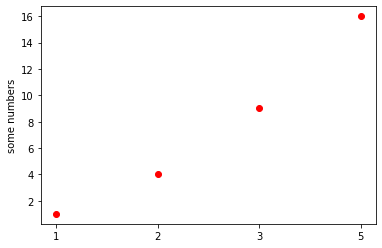

In [6]:
plt.plot(['1', '2', '3', '5'], [1, 4, 9, 16], 'ro')
plt.ylabel('some numbers')
plt.show()

In [25]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

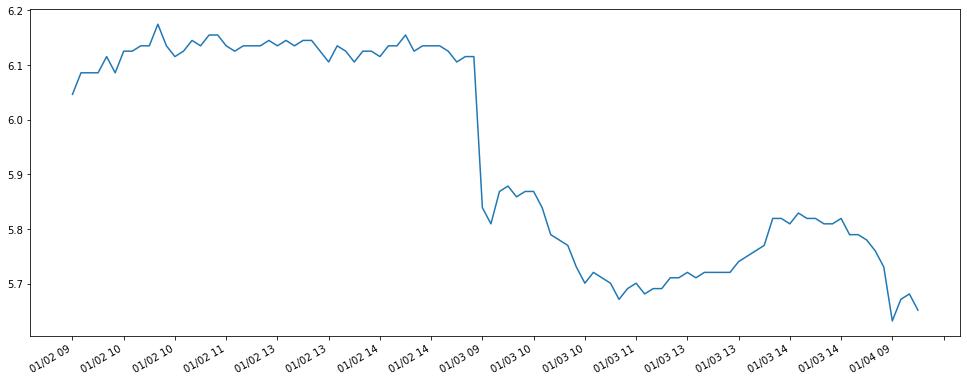

In [114]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

tm = dt_df.index[99]
ydata = dt_df.loc[:tm,'close'].values
xdata = np.arange(len(ydata))

# format the ticks
tmLabel = dt_df.loc[:tm,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.show()

In [48]:
data = dt_df[100:200]
data_up = data.query('open <= close')
data_down = data.query('open > close')

In [57]:
data.head()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-04 09:55:00,5.6907,194093.0,5.6512,33800.0,5.7105,5.6512,100
2019-01-04 10:00:00,5.6907,116508.0,5.6907,20200.0,5.7006,5.6907,101
2019-01-04 10:05:00,5.7303,206209.0,5.6907,35800.0,5.7303,5.6809,102
2019-01-04 10:10:00,5.7105,161036.0,5.7303,27800.0,5.7401,5.7105,103
2019-01-04 10:15:00,5.7303,186611.0,5.7105,32200.0,5.7303,5.7105,104


In [58]:
data.tail()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-08 09:50:00,6.3329,1573415.0,6.4219,243800.0,6.4219,6.3329,195
2019-01-08 09:55:00,6.3428,1328574.0,6.3428,207200.0,6.3626,6.3132,196
2019-01-08 10:00:00,6.3132,892633.0,6.3527,139400.0,6.3527,6.3033,197
2019-01-08 10:05:00,6.3231,675079.0,6.3132,105490.0,6.3329,6.3132,198
2019-01-08 10:10:00,6.2638,934484.0,6.3231,146810.0,6.3231,6.2539,199


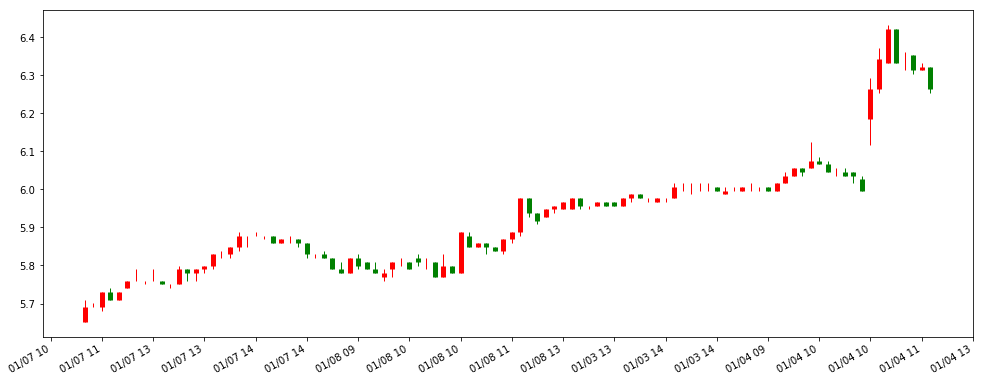

In [60]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.show()

In [55]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [59]:
pd.core.index

<module 'pandas.core.index' from 'd:\\Users\\zhangyun29\\AppData\\Local\\Programs\\Python\\Python36-64\\lib\\site-packages\\pandas\\core\\index.py'>

In [38]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [27]:
def verity_valley_after_peak(lv_L):
    return True

In [39]:
verify_end_to_end(m.Lv1_L)

[[177.0, Point(192.0, 22.32, -1), Point(191.0, 22.26, 1)],
 [1668.0, Point(1679.0, 22.23, 1), Point(1676.0, 22.3, -1)],
 [1709.0, Point(1712.0, 21.74, -1), Point(1731.0, 21.68, -1)],
 [1946.0, Point(1949.0, 21.79, 1), Point(1968.0, 21.83, 1)],
 [1968.0, Point(1975.0, 21.85, 1), Point(1977.0, 21.95, -1)],
 [2464.0, Point(2504.0, 22.35, -1), Point(2491.0, 22.44, -1)],
 [2583.0, Point(2592.0, 22.15, -1), Point(2615.0, 22.15, -1)],
 [2792.0, Point(2803.0, 22.09, 1), Point(2851.0, 22.12, 1)],
 [2851.0, Point(2882.0, 22.18, -1), Point(2865.0, 22.26, -1)],
 [2865.0, Point(2873.0, 22.19, -1), Point(2884.0, 22.02, 1)],
 [3931.0, Point(3970.0, 22.71, 1), Point(3954.0, 22.63, 1)],
 [4589.0, Point(4594.0, 23.31, -1), Point(4596.0, 23.22, 1)],
 [5306.0, Point(5311.0, 24.3, 1), Point(5310.0, 24.34, -1)],
 [5364.0, Point(5373.0, 24.35, -1), Point(5371.0, 24.19, 1)],
 [5371.0, Point(5400.0, 24.39, -1), Point(5382.0, 24.44, -1)],
 [5382.0, Point(5393.0, 24.4, -1), Point(5399.0, 24.3, 1)],
 [5532.0, Poi

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [36]:
tmIdx = 15929


In [33]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [37]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

((1904, Stick(drt:1, lv:0, Point(15927.0, 33.11, 1))),
 (392, Trend1(1, 2, Point(15927.0, 33.11, 1))),
 (86, Trend2(1, 2, Point(15927.0, 33.11, 1))))

In [35]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [94]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [31]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [32]:
draw_k(15027,500)

AttributeError: 'str' object has no attribute 'get'

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [102]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


### draw Pair

In [105]:
p = find_pair(tmIdx,0)[1]
p.__dict__

{'P': 33.61,
 'S': 33.11,
 'TmS': 15927.0,
 'cc': 0.55,
 'ccHL': (7, 18, 33.28499999999999, 33.559999999999974),
 'chain_layer': 2,
 'core': 33.50999999999998,
 'core_index': 16,
 'drt': 1,
 'his': [[33.11,
   33.135,
   33.16,
   33.184999999999995,
   33.209999999999994,
   33.23499999999999,
   33.25999999999999,
   33.28499999999999,
   33.30999999999999,
   33.33499999999999,
   33.359999999999985,
   33.384999999999984,
   33.40999999999998,
   33.43499999999998,
   33.45999999999998,
   33.48499999999998,
   33.50999999999998,
   33.534999999999975,
   33.559999999999974,
   33.58499999999997,
   33.61],
  array([0.2       , 0.53333333, 0.53333333, 0.78333333, 0.45      ,
         0.25      , 0.45      , 0.2       , 0.2       , 0.2       ,
         0.84285714, 1.04285714, 0.54285714, 0.34285714, 0.25396825,
         0.97619048, 1.33730159, 0.69444444, 0.69444444, 0.47222222])],
 'index': [1904, 1905],
 'status': 1}

In [186]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [187]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

Point(15927.0, 33.11, 1)

In [188]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

Point(15936.0, 33.36, 1)

In [189]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


In [190]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,NaN,NaN,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,NaN,NaN,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,NaN,NaN,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,NaN,NaN,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,NaN,NaN,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,NaN,NaN,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,NaN,NaN,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,NaN,NaN,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,NaN,NaN,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,NaN,NaN,33.25,33.36,33.23,33.25


In [191]:
df_p

,TmIdx,V
0,15927,33.110000
2,15928,33.137778
3,15929,33.165556
4,15930,33.193333
5,15931,33.221111
6,15932,33.248889
7,15933,33.276667
8,15934,33.304444
9,15935,33.332222
1,15936,33.360000


In [193]:
df_draw.fillna('', inplace=True)
df_draw

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,,,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,,,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,,,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,,,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,,,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,,,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,,,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,,,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,,,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,,,33.25,33.36,33.23,33.25


In [201]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [198]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [199]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [200]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)